# Download models


In [ ]:
!pip install nbeats-pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.10 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.20.0 which is incompatible.
google-api-core 2.19.2 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0.dev0,>=3.19.5, but you have protobuf 3.20.0 which is incompatible.
google-cloud-aiplatform 1.70.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.20.0 which is incompatible.
google-cloud-bigquery-connection 1.15.5 requir

In [ ]:
!pip install pytorch-forecasting

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 44.3 MB/s eta 0:00:00


# Load Dataset

In [2]:
!wget ftp://ita.ee.lbl.gov/traces/NASA_access_log_Jul95.gz -O /content/NASA_access_log_Jul95.gz
!wget ftp://ita.ee.lbl.gov/traces/NASA_access_log_Aug95.gz -O /content/NASA_access_log_Aug95.gz

--2024-12-09 19:49:16--  ftp://ita.ee.lbl.gov/traces/NASA_access_log_Jul95.gz
           => ‘/content/NASA_access_log_Jul95.gz’
Resolving ita.ee.lbl.gov (ita.ee.lbl.gov)... 131.243.2.164, 2620:83:8000:102::a4
Connecting to ita.ee.lbl.gov (ita.ee.lbl.gov)|131.243.2.164|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /traces ... done.
==> SIZE NASA_access_log_Jul95.gz ... 20676672
==> PASV ... done.    ==> RETR NASA_access_log_Jul95.gz ... done.
Length: 20676672 (20M) (unauthoritative)

NASA_access_log_Jul 100%[===================>]  19.72M  7.33MB/s    in 2.7s    

2024-12-09 19:49:20 (7.33 MB/s) - ‘/content/NASA_access_log_Jul95.gz’ saved [20676672]

--2024-12-09 19:49:20--  ftp://ita.ee.lbl.gov/traces/NASA_access_log_Aug95.gz
           => ‘/content/NASA_access_log_Aug95.gz’
Resolving ita.ee.lbl.gov (ita.ee.lbl.gov)... 131.243.2.164, 2620:83:8000:102::a4
Connecting to ita.ee.lbl.gov (ita.ee.lbl.gov)|131

In [3]:
# Save the file to Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# !cp /content/NASA_access_log_Aug95.gz /content/drive/MyDrive/

# Code to load the file later
# import gzip
# with gzip.open('/content/drive/MyDrive/NASA_access_log_Aug95.gz', 'rt') as f:
#     for line in f:
#         # process each line
#         print(line)

In [5]:
import gzip
import shutil

with gzip.open('/content/NASA_access_log_Jul95.gz', 'rb') as f_in:
    with open('/content/NASA_access_log_Jul95.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with open('/content/NASA_access_log_Jul95.txt', 'rb') as f:
    file_content_Jul = f.read().decode('latin-1')  # Decode using 'latin-1'

with gzip.open('/content/NASA_access_log_Aug95.gz', 'rb') as f_in:
    with open('/content/NASA_access_log_Aug95.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with open('/content/NASA_access_log_Aug95.txt', 'rb') as f:
    file_content_Aug = f.read().decode('latin-1')  # Decode using 'latin-1'


In [6]:
print("Jul length", len(file_content_Jul))
print("Aug length", len(file_content_Aug))
print("total", len(file_content_Aug)+len(file_content_Jul))

Jul length 205242368
Aug length 167813770
total 373056138


In [7]:
"""
request format: host, timestamp ["DAY MON DD HH:MM:SS YYYY"], HTTP reply code, bytes in the reply.
ex. in24.inetnebr.com - - [01/Aug/1995:00:00:01 -0400] "GET /shuttle/missions/sts-68/news/sts-68-mcc-05.txt HTTP/1.0" 200 1839

"""
import re
data = []
file_contents = [file_content_Jul, file_content_Aug]
for file_content in file_contents:
  for request in file_content.split('\n'):
    match = re.search(r'^(\S+)\s+-\s+-\s+\[(.*?)\]\s+"(.*?)"\s+(\d+)\s+(\d+|-)$', request)
    if match:
        host = match.group(1)
        timestamp = match.group(2)
        request_line = match.group(3)
        reply_code = match.group(4)
        reply_bytes = match.group(5)
        data.append([host, timestamp, request_line, reply_code, reply_bytes])
    else:
        print(f"No match found for request: {request}")


No match found for request: alyssa.p
No match found for request: 


In [8]:
# Preprocess data
import pandas as pd
from datetime import datetime


# Extract timestamps and create a DataFrame
timestamps = [entry[1] for entry in data]
# Convert to datetime format
timestamp_parsed = [datetime.strptime(ts.split()[0], '%d/%b/%Y:%H:%M:%S') for ts in timestamps]

# Count the number of requests per second
df = pd.DataFrame({'timestamp': timestamp_parsed})
df['request_count'] = 1
df = df.set_index('timestamp').resample('1min').sum().fillna(0)  # Resample by minutes

print(len(df))
print(df.head(10))

89280
                     request_count
timestamp                         
1995-07-01 00:00:00             42
1995-07-01 00:01:00             61
1995-07-01 00:02:00             57
1995-07-01 00:03:00             71
1995-07-01 00:04:00             70
1995-07-01 00:05:00             54
1995-07-01 00:06:00             52
1995-07-01 00:07:00             68
1995-07-01 00:08:00             47
1995-07-01 00:09:00             46


In [9]:
train_start_date = datetime(1995, 7, 1, 0, 0, 0)
train_end_date = datetime(1995, 8, 14, 23, 59, 59)

train_data = df[(df.index >= train_start_date) & (df.index <= train_end_date)]
test_data = df[df.index > train_end_date]

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (64800, 1)
Testing data shape: (24480, 1)


#NBeats


In [ ]:

train_data = train_data.values.reshape(-1)
test_data = test_data.values.reshape(-1)

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

In [ ]:
import numpy as np

# Creating input and output sequences for supervised learning (windowed data)
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys).reshape(-1, 1)

seq_length = 10
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")


Training data shape: (64790, 10), (64790, 1)
Testing data shape: (24470, 10), (24470, 1)


In [ ]:
# milk = pd.read_csv('milk.csv', index_col=0, parse_dates=True)
# milk = milk.values.flatten()  # just keep np array here for simplicity.

# # data backcast/forecast generation.
# x, y = [], []
# backcast_length = 10
# forecast_length = 1
# for epoch in range(backcast_length, len(milk) - forecast_length):
#     x.append(milk[epoch - backcast_length:epoch])
#     y.append(milk[epoch:epoch + forecast_length])
# x = np.array(x)
# y = np.array(y)

# # split train/test.
# c = int(len(x) * 0.8)
# x_train, y_train = x[:c], y[:c]
# x_test, y_test = x[c:], y[c:]
# print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(125, 10) (125, 1) (32, 10) (32, 1)


## Data Augmentation

In [ ]:
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# Data augmentation function
def augment_data(X, y, noise_level=1):
    augmented_X = []
    augmented_y = []

    for i in range(len(X)):

        # Jittering: Add small noise
        noise = np.random.randint(0, noise_level + 1, X[i].shape)
        augmented_X.append(X[i] + noise)
        augmented_y.append(y[i])

        noise = np.random.randint(-noise_level, noise_level , X[i].shape)
        augmented_X.append(X[i] + noise)
        augmented_y.append(y[i])

        # Shifting
        offset = np.random.randint(0, 5)
        augmented_X.append(X[i]+offset)
        augmented_y.append(y[i]+offset)

    return np.array(augmented_X), np.array(augmented_y)

# X_augmented, y_augmented = augment_data(X, y)

# # Combine original and augmented data
# X = np.concatenate((X, X_augmented), axis=0)
# y = np.concatenate((y, y_augmented), axis=0)


# Augment only the training data
X_train_augmented, y_train_augmented = augment_data(X_train, y_train)

# Combine original training data and augmented training data
X_train = np.concatenate((X_train, X_train_augmented), axis=0)
y_train = np.concatenate((y_train, y_train_augmented), axis=0)

# # Normalization
# norm_constant = np.max(X_combined)
# X_combined, y_combined = X_combined / norm_constant, y_combined / norm_constant
# X_test, y_test = X_test / norm_constant, y_test / norm_constant

print(f"Train augmented data shape: {X_train_augmented.shape}, {y_train_augmented.shape}")
print(f"Train total data shape: {X_train.shape}, {y_train.shape}")


Train augmented data shape: (194370, 10), (194370, 1)
Train total data shape: (259160, 10), (259160, 1)


## Train model

In [ ]:
import torch
import torch.nn as nn
from nbeats_pytorch.model import NBeatsNet
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

batch_size = 2048
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

nbeats_model = NBeatsNet(
    device=device,
    stack_types=(NBeatsNet.GENERIC_BLOCK, NBeatsNet.GENERIC_BLOCK),
    forecast_length=1,  # Predict one timestamp ahead
    thetas_dim=(2, 2),
    nb_blocks_per_stack=1,
    backcast_length=seq_length,
    share_weights_in_stack=True,
    hidden_layer_units=16
)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(nbeats_model.parameters(), lr=0.0001, weight_decay=1e-4)

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=True)
     | -- GenericBlock(units=16, thetas_dim=2, backcast_length=10, forecast_length=1, share_thetas=False) at @135062181755008
| --  Stack Generic (#1) (share_weights_in_stack=True)
     | -- GenericBlock(units=16, thetas_dim=2, backcast_length=10, forecast_length=1, share_thetas=False) at @135062181755968


In [ ]:

# Training loop
epochs = 200
best_test_loss = 100
for epoch in range(epochs):
    nbeats_model.train()  # Set model to training mode

    # Training phase
    train_loss = 0.0
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        optimizer.zero_grad()
        forecast = nbeats_model(x_batch)[1]  # Model returns backcast and forecast
        loss = criterion(forecast, y_batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * x_batch.size(0)

    train_loss /= len(train_loader.dataset)

    # Evaluation phase
    nbeats_model.eval()  # Set model to evaluation mode
    test_loss = 0.0
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)

            forecast = nbeats_model(x_batch)[1]
            loss = criterion(forecast, y_batch)

            test_loss += loss.item() * x_batch.size(0)

    test_loss /= len(test_loader.dataset)
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        torch.save(nbeats_model.state_dict(), 'best_nbeats_model.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')


Epoch 1/200, Train Loss: 2481.5819, Test Loss: 1904.3711
Epoch 2/200, Train Loss: 2108.8778, Test Loss: 1475.2791
Epoch 3/200, Train Loss: 1300.0851, Test Loss: 573.9589
Epoch 4/200, Train Loss: 339.8200, Test Loss: 210.0077
Epoch 5/200, Train Loss: 228.3503, Test Loss: 207.8899
Epoch 6/200, Train Loss: 223.6011, Test Loss: 203.9797
Epoch 7/200, Train Loss: 218.2994, Test Loss: 199.5198
Epoch 8/200, Train Loss: 213.0137, Test Loss: 196.4795
Epoch 9/200, Train Loss: 209.1846, Test Loss: 193.8086
Epoch 10/200, Train Loss: 206.1194, Test Loss: 191.7621
Epoch 11/200, Train Loss: 203.5200, Test Loss: 190.3347
Epoch 12/200, Train Loss: 201.7899, Test Loss: 189.4116
Epoch 13/200, Train Loss: 200.5644, Test Loss: 188.9514
Epoch 14/200, Train Loss: 199.7759, Test Loss: 188.5621
Epoch 15/200, Train Loss: 199.2444, Test Loss: 188.3164
Epoch 16/200, Train Loss: 198.8607, Test Loss: 188.1602
Epoch 17/200, Train Loss: 198.5346, Test Loss: 187.9742
Epoch 18/200, Train Loss: 198.2328, Test Loss: 187.8

# DeepAR

In [ ]:
# Reset the index and rename it to 'timestamp'
train_data = train_data.reset_index().rename(columns={'index': 'timestamp'})
test_data = test_data.reset_index().rename(columns={'index': 'timestamp'})
train_data['timestamp'] = train_data['timestamp'].astype('int64') // 10**9
train_data['time_idx'] = (train_data['timestamp'] - train_data['timestamp'].min()) // 60
train_data['time_idx'] = train_data['time_idx'].astype(int)
test_data['timestamp'] = test_data['timestamp'].astype('int64') // 10**9
test_data['time_idx'] = (test_data['timestamp'] - train_data['timestamp'].min()) // 60
test_data['time_idx'] = test_data['time_idx'].astype(int)
# Create datasets for training
train_data['group'] = 'NASA'
test_data['group'] = 'NASA'

max_prediction_length = 1  # forecast one timestamp ahead
max_encoder_length = 10  # use 10 timestamps of history
train_data["request_count"] = train_data["request_count"].astype(float)
test_data["request_count"] = test_data["request_count"].astype(float)

## Data Augmentation

In [ ]:
import numpy as np
import pandas as pd
def augment_data(data, augmentations=None, noise_level=0.05, scale_factor_range=(0.9, 1.1)):
    """
    Apply data augmentation techniques to time series data.

    Args:
        data (pd.DataFrame): Original time series data.
        augmentations (list of str): List of augmentations to apply, e.g., ['jitter', 'scaling'].
        noise_level (float): Standard deviation of noise for jittering.
        scale_factor_range (tuple): Min and max factors for scaling.
    Returns:
        pd.DataFrame: Augmented data.
    """
    augmented_data = data.copy()
    augmentations = augmentations or []

    if 'jitter' in augmentations:
        noise = np.random.randint(0, noise_level + 1, len(data))
        augmented_data['request_count'] += noise

    if 'scaling' in augmentations:
        scale_factor = np.random.uniform(*scale_factor_range)
        augmented_data['request_count'] *= scale_factor
        augmented_data['request_count'] = augmented_data['request_count'].astype(int)

    # if 'time_warp' in augmentations:
    #     augmented_data['time_idx'] += np.random.normal(0, noise_level * 10, size=len(data))


    return augmented_data

# Apply augmentations and append to original data
print("original data length", len(train_data))
augmented_datasets = [train_data]
for i in range(5):  # Create 5 augmented versions
    augmented_data = augment_data(
        train_data,
        augmentations=['jitter', 'scaling', 'time_warp']
    )
    temp_pd = pd.concat(augmented_datasets, ignore_index=True)
    augment_time_base = max(temp_pd['time_idx'])
    time_base = min(temp_pd['time_idx'])
    augmented_data['group'] = 'augmented'+str(i)
    augmented_data['time_idx'] += augment_time_base - time_base
    augmented_datasets.append(augmented_data)

# Concatenate all augmented datasets
augmented_data = pd.concat(augmented_datasets, ignore_index=True)
print("augmented data length", len(augmented_data))

original data length 64800
augmented data length 388800


## Train

In [ ]:
import torch
import torch.nn as nn
from pytorch_forecasting import DeepAR, TimeSeriesDataSet
from pytorch_forecasting.data import NaNLabelEncoder,  EncoderNormalizer, TorchNormalizer, GroupNormalizer
from pytorch_forecasting.metrics import QuantileLoss, MultivariateNormalDistributionLoss, MAE
from pytorch_forecasting.metrics.distributions import NegativeBinomialDistributionLoss
from pytorch_lightning import Trainer
from torch.optim.lr_scheduler import ReduceLROnPlateau


train_dataset = TimeSeriesDataSet(
    augmented_data,
    time_idx="time_idx",
    target="request_count",
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    static_categoricals=[],  # No static categorical features
    time_varying_known_reals=["time_idx"],  # Known inputs
    time_varying_unknown_reals=["request_count"],  # Values we want to predict
    # target_normalizer= TorchNormalizer(),
    target_normalizer=GroupNormalizer(transformation="softplus", center=False),
    group_ids=["group"],
)

val_dataset = TimeSeriesDataSet(
    test_data,
    time_idx="time_idx",
    target="request_count",
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    static_categoricals=[],  # No static categorical features
    time_varying_known_reals=["time_idx"],  # Known inputs
    time_varying_unknown_reals=["request_count"],  # Values we want to predict
    # target_normalizer= TorchNormalizer(),
    target_normalizer=GroupNormalizer(transformation="softplus", center=False),
    group_ids=["group"],
)
#TimeSeriesDataSet.from_dataset(train_dataset, test_data, predict=True, stop_randomization=True)

# Dataloaders
batch_size = 64
train_loader = train_dataset.to_dataloader(train=True, batch_size=batch_size)
val_loader = val_dataset.to_dataloader(train=False, batch_size=batch_size)

class DeepARWithScheduler(DeepAR):
    def configure_optimizers(self):
        # Configure the optimizer
        optimizer = torch.optim.Adam(self.parameters(), lr=self.hparams.learning_rate)

        scheduler = ReduceLROnPlateau(
            optimizer,
            mode="min",               # Minimize the validation loss
            factor=0.5,               # Reduce learning rate by a factor of 0.1
            patience=10,              # Number of epochs with no improvement after which LR will be reduced
            threshold=0.001,          # Minimum change to qualify as an improvement
            min_lr=1e-7,              # Lower bound for the learning rate
            verbose=True              # Print a message when the learning rate is reduced
        )

        return {
            "optimizer": optimizer,
            "lr_scheduler": {
                "scheduler": scheduler,
                "monitor": "val_loss",  # Use validation loss as a monitoring metric
            },
        }

# Instantiate the DeepAR model with scheduler
deepar_model = DeepARWithScheduler.from_dataset(
    train_dataset,
    learning_rate=0.001,
    hidden_size=64,
    rnn_layers=2,
    dropout=0.1,
    loss=NegativeBinomialDistributionLoss()
)

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
/usr/local/lib/python3.10/dist-packages/pytorch_forecasting/models/deepar/__init__.py:120: UserWarning: In pytorch-forecasting models, on versions 1.1.X, the default optimizer defaults to 'adam', if pytorch_optimizer is not installed, otherwise it defaults to 'ranger' from pytorch_optimizer. From version 1.2.0, the default optimizer will be 'adam' regardless of whether pytorch_optimizer is installed, in order to minimize the number of dependencies in defau

In [ ]:
from lightning.pytorch.tuner import Tuner
import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping
from pytorch_lightning.loggers import CSVLogger

early_stop_callback = EarlyStopping(monitor="val_RMSE", min_delta=1e-2, patience=10, verbose=False, mode="min")
logger = CSVLogger("lightning_logs", name="deepar_training")
trainer = pl.Trainer(
    max_epochs=200,
    accelerator="cpu",
    enable_model_summary=True,
    gradient_clip_val=0.1,
    callbacks=[early_stop_callback],
    limit_train_batches=50,
    enable_checkpointing=True,
    logger=logger
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:

# res = Tuner(trainer).lr_find(
#     deepar_model,
#     train_dataloaders=train_loader,
#     val_dataloaders=val_loader,
#     min_lr=1e-5,
#     max_lr=1e0,
#     early_stop_threshold=100,
# )
# print(f"suggested learning rate: {res.suggestion()}")
# fig = res.plot(show=True, suggest=True)
# fig.show()
# deepar_model.hparams.learning_rate = res.suggestion()

In [ ]:
# deepar_model = DeepAR.from_dataset(
#     train_dataset,
#     learning_rate=0.02238,
#     hidden_size=16,
#     dropout=0.1,
#     # Specify the loss metric; for a single target, it should match your target count
#     loss=MultivariateNormalDistributionLoss() #QuantileLoss(quantiles=[0.5]),  # Use the median for point forecasting
# )
trainer.fit(
    deepar_model,
    train_dataloaders=train_loader,
    val_dataloaders=val_loader,
)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
INFO: 
  | Name                   | Type                             | Params | Mode 
------------------------------------------------------------------------------------
0 | loss                   | NegativeBinomialDistributionLoss | 0      | train
1 | logging_metrics        | ModuleList                       | 0      | train
2 | embeddings             | MultiEmbedding                   | 0      | train
3 | rnn                    | LSTM                             | 50.7 K | train
4 | distribution_projector | Linear                           | 130    | train
------------------------------------------------------------------------------------
50.8 K    Trainable params
0         Non-trainable params
50.8 K    Total params
0.203     Total estimated model params size (MB)
11        Modules in train

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

    epoch  step  train_loss_epoch  train_loss_step    val_MAE   val_MAPE  \
0       0    49               NaN         4.469368        NaN        NaN   
1       0    49               NaN              NaN  12.498094  8167389.0   
2       0    49          5.564531              NaN        NaN        NaN   
3       1    99               NaN         3.559039        NaN        NaN   
4       1    99               NaN              NaN  11.401200  6000013.5   
5       1    99          4.012019              NaN        NaN        NaN   
6       2   149               NaN         3.816932        NaN        NaN   
7       2   149               NaN              NaN  11.627091  5770984.0   
8       2   149          3.771052              NaN        NaN        NaN   
9       3   199               NaN         3.996929        NaN        NaN   
10      3   199               NaN              NaN  10.769546  4609363.0   
11      3   199          3.649448              NaN        NaN        NaN   
12      4   

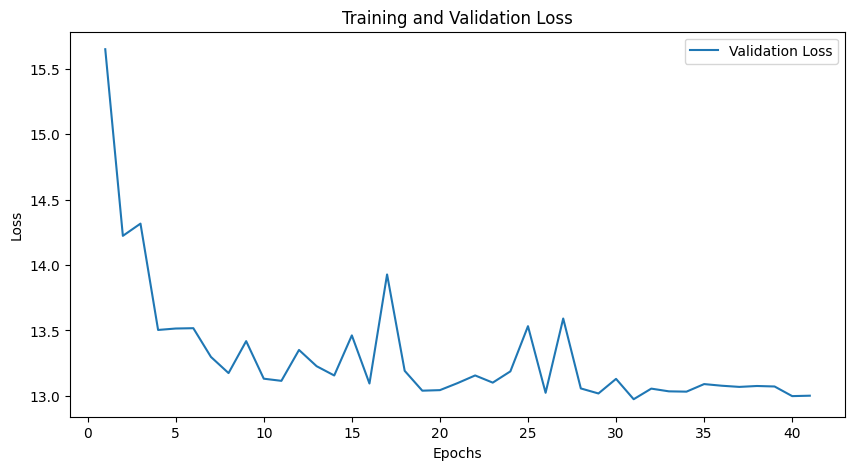

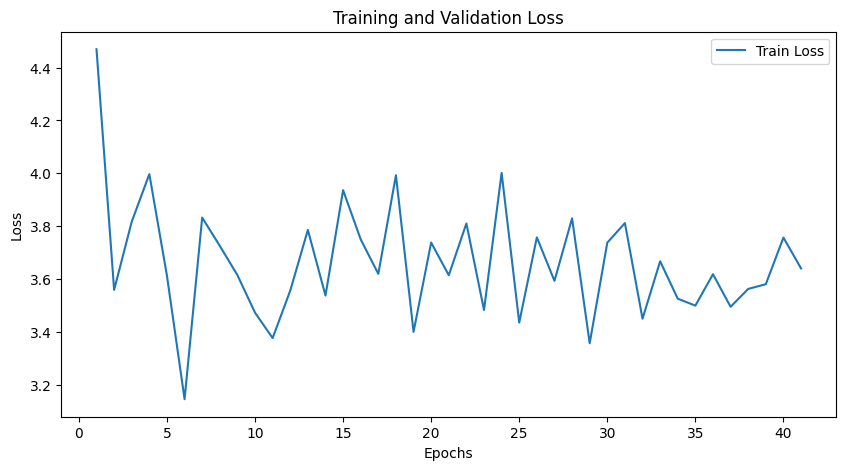

In [ ]:
import matplotlib.pyplot as plt
# Load the metrics CSV
metrics = pd.read_csv(f"{logger.log_dir}/metrics.csv")
print(metrics.head(20))
# Extract training and validation loss
train_loss = metrics['train_loss_step'].dropna()
val_loss = metrics['val_RMSE'].dropna()
# print("train_loss", train_loss)
print("val_loss", val_loss)
print("val_MAE", metrics['val_MAE'].dropna())
epochs = range(1, len(val_loss) + 1)
train_loss = train_loss[:len(val_loss)]
# Plot losses
plt.figure(figsize=(10, 5))
# plt.plot(epochs, train_loss, label="Train Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label="Train Loss")
# plt.plot(epochs, val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model_path = trainer.checkpoint_callback.best_model_path
best_model = DeepAR.load_from_checkpoint(best_model_path)

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


# TFT
##### Performance
- RMSE: 13.647946
- MAE: 10.4

In [ ]:
# Reset the index and rename it to 'timestamp'
train_data = train_data.reset_index().rename(columns={'index': 'timestamp'})
test_data = test_data.reset_index().rename(columns={'index': 'timestamp'})
train_data['timestamp'] = train_data['timestamp'].astype('int64') // 10**9
train_data['time_idx'] = (train_data['timestamp'] - train_data['timestamp'].min()) // 60
train_data['time_idx'] = train_data['time_idx'].astype(int)
test_data['timestamp'] = test_data['timestamp'].astype('int64') // 10**9
test_data['time_idx'] = (test_data['timestamp'] - train_data['timestamp'].min()) // 60
test_data['time_idx'] = test_data['time_idx'].astype(int)
# Create datasets for training
train_data['group'] = 'NASA'
test_data['group'] = 'NASA'

max_prediction_length = 1  # forecast one timestamp ahead
max_encoder_length = 10  # use 10 timestamps of history
train_data["request_count"] = train_data["request_count"].astype(float)
test_data["request_count"] = test_data["request_count"].astype(float)

In [ ]:
# !pip install torch --upgrade --force-reinstall
# !pip install pytorch_lightning --upgrade --force-reinstall

In [ ]:
import torch
import torch.nn as nn
from pytorch_forecasting import TimeSeriesDataSet
from pytorch_forecasting.data import NaNLabelEncoder,  EncoderNormalizer, TorchNormalizer, GroupNormalizer
from pytorch_forecasting.metrics import QuantileLoss, MultivariateNormalDistributionLoss, MAE
from pytorch_forecasting.metrics.distributions import NegativeBinomialDistributionLoss
from pytorch_lightning import Trainer
from torch.optim.lr_scheduler import ReduceLROnPlateau


train_dataset = TimeSeriesDataSet(
    train_data,
    time_idx="time_idx",
    target="request_count",
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    static_categoricals=[],  # No static categorical features
    time_varying_known_reals=["time_idx"],  # Known inputs
    time_varying_unknown_reals=["request_count"],  # Values we want to predict
    # target_normalizer= TorchNormalizer(),
    target_normalizer=GroupNormalizer(transformation="softplus", center=False),
    group_ids=["group"],
)

val_dataset = TimeSeriesDataSet(
    test_data,
    time_idx="time_idx",
    target="request_count",
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    static_categoricals=[],  # No static categorical features
    time_varying_known_reals=["time_idx"],  # Known inputs
    time_varying_unknown_reals=["request_count"],  # Values we want to predict
    # target_normalizer= TorchNormalizer(),
    target_normalizer=GroupNormalizer(transformation="softplus", center=False),
    group_ids=["group"],
)
#TimeSeriesDataSet.from_dataset(train_dataset, test_data, predict=True, stop_randomization=True)

# Dataloaders
batch_size = 2048
train_loader = train_dataset.to_dataloader(train=True, batch_size=batch_size)
val_loader = val_dataset.to_dataloader(train=False, batch_size=batch_size)


In [ ]:
from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
import lightning.pytorch as pl
from pytorch_lightning.loggers import CSVLogger
from lightning.pytorch.callbacks import EarlyStopping


early_stop_callback = EarlyStopping(monitor="val_RMSE", min_delta=1e-2, patience=10, verbose=False, mode="min")
logger = CSVLogger("lightning_logs", name="tft_training")
trainer = pl.Trainer(
    accelerator="auto",
    callbacks=[early_stop_callback],
    # clipping gradients is a hyperparameter and important to prevent divergance
    # of the gradient for recurrent neural networks
    gradient_clip_val=0.1,
    max_epochs=200,
    enable_model_summary=True,
    enable_checkpointing=True,
    logger=logger
)


tft = TemporalFusionTransformer.from_dataset(
    train_dataset,
    # not meaningful for finding the learning rate but otherwise very important
    learning_rate=0.03,
    hidden_size=8,  # most important hyperparameter apart from learning rate
    # number of attention heads. Set to up to 4 for large datasets
    attention_head_size=2,
    dropout=0.1,  # between 0.1 and 0.3 are good values
    hidden_continuous_size=8,  # set to <= hidden_size
    loss=NegativeBinomialDistributionLoss()
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Number of parameters in network: 4.8k


/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
/usr/local/lib/python3.10/dist-packages/pytorch_forecasting/models/temporal_fusion_transformer/__init__.py:143: UserWarning: In pytorch-forecasting models, on versions 1.1.X, the default optimizer defaults to 'adam', if pytorch_optimizer is not installed, otherwise it defaults to 'ranger' from pytorch_optimizer. From version 1.2.0, the default optimizer will be 'adam' regardless of whether pytorch_optimizer is installed, in order to minimize the number of 

In [ ]:
trainer.fit(
    tft,
    train_dataloaders=train_loader,
    val_dataloaders=val_loader,
)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
   | Name                               | Type                             | Params | Mode 
-------------------------------------------------------------------------------------------------
0  | loss                               | NegativeBinomialDistributionLoss | 0      | train
1  | logging_metrics                    | ModuleList                       | 0      | train
2  | input_embeddings                   | MultiEmbedding                   | 0      | train
3  | prescalers                         | ModuleDict                       | 32     | train
4  | static_variable_selection          | VariableSelectionNetwork         | 0      | train
5  | encoder_variable_selection         | VariableSelectionNetwork         | 718    | train
6  | decoder_variable_selection         | VariableSelectionNetwork         | 320    | train
7  | static_context_variable

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (31) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

    epoch  step  train_loss_epoch  train_loss_step    val_MAE    val_MAPE  \
0       0    30               NaN              NaN  11.141625  3834188.75   
1       0    30          4.361525              NaN        NaN         NaN   
2       1    49               NaN         3.743796        NaN         NaN   
3       1    61               NaN              NaN  12.243383  4259935.00   
4       1    61          3.712498              NaN        NaN         NaN   
5       2    92               NaN              NaN  10.523469  2812226.25   
6       2    92          3.657511              NaN        NaN         NaN   
7       3    99               NaN         3.805201        NaN         NaN   
8       3   123               NaN              NaN  10.691655  2829958.75   
9       3   123          3.626200              NaN        NaN         NaN   
10      4   149               NaN         3.522096        NaN         NaN   
11      4   154               NaN              NaN  10.622408  3229870.00   

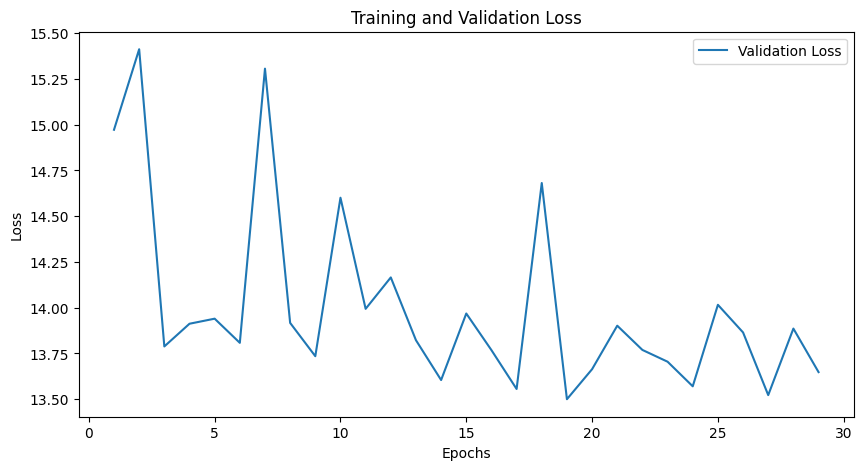

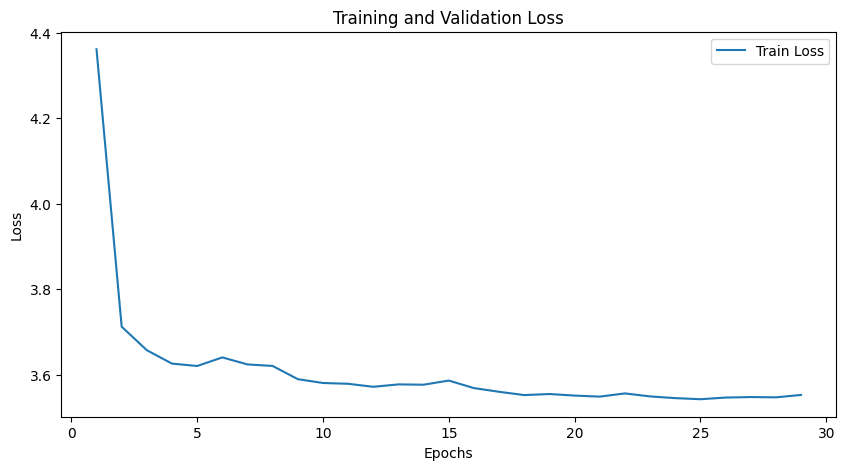

In [ ]:
import matplotlib.pyplot as plt
# Load the metrics CSV
metrics = pd.read_csv(f"{logger.log_dir}/metrics.csv")
print(metrics.head(20))
# Extract training and validation loss
train_loss = metrics['train_loss_epoch'].dropna()
val_loss = metrics['val_RMSE'].dropna()
# print("train_loss", train_loss)
print("val_loss", val_loss)
print("val_MAE", metrics['val_MAE'].dropna())
epochs = range(1, len(val_loss) + 1)
train_loss = train_loss[:len(val_loss)]
# Plot losses
plt.figure(figsize=(10, 5))
# plt.plot(epochs, train_loss, label="Train Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label="Train Loss")
# plt.plot(epochs, val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

# Autoformer
##### Performace
[E2D2 nodropout] MSE: 194.8812, MAE: 10.5344, RMSE: 13.9600, R2: 0.6962

[E3D3 dropout0.1] MSE: 193.6100, MAE: 10.4952, RMSE: 13.9144, R2: 0.6982

In [ ]:
def add_time_features(data):
    # Extract features: hour of day, day of week
    time = pd.to_datetime(data.index)
    hours = time.hour.values
    days_of_week = time.dayofweek.values

    # Stack features into a 2D array (num_samples, num_time_features)
    time_features = np.stack([hours, days_of_week], axis=1)
    print("time features shape", time_features.shape)
    return time_features
def create_time_sequences(data, time_features, seq_length):
    xs, ys, time_xs, observed_mask = [], [], [], []
    time_ys = []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        time_x = time_features[i:i+seq_length]
        time_y = time_features[i+seq_length]

        xs.append(x)
        ys.append(y)
        time_xs.append(time_x)
        observed_mask.append([1]*seq_length)
        time_ys.append(time_y)

    return np.array(xs), np.array(ys).reshape(-1, 1), np.array(time_xs), np.array(observed_mask), np.array(time_ys)


In [ ]:

import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import torch

train_time_features = add_time_features(train_data)
test_time_features = add_time_features(test_data)

train_time_idx = (train_data.index - train_data.index.min()) // 60
train_time_idx = train_time_idx.astype(int)
test_time_idx = (test_data.index - test_data.index.min()) // 60
test_time_idx = test_time_idx.astype(int)

train_data = train_data.values.reshape(-1, 1)
test_data = test_data.values.reshape(-1, 1)
# Step 3: Create sequences with temporal features
seq_length = 10
X_train, y_train, X_train_time, X_train_mask, y_train_time = create_time_sequences(train_data, train_time_features, seq_length)
X_test, y_test, X_test_time, X_test_mask, y_test_time = create_time_sequences(test_data, test_time_features, seq_length)
X_train_time_idx = np.array(train_time_idx)
X_test_time_idx = np.array(test_time_idx)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])
y_train_time = y_train_time.reshape(y_train_time.shape[0], 1, y_train_time.shape[1])
y_test_time = y_test_time.reshape(y_test_time.shape[0], 1, y_test_time.shape[1])

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_train_time = torch.tensor(X_train_time, dtype=torch.float32)
X_train_mask = torch.tensor(X_train_mask, dtype=torch.float32)
y_train_time = torch.tensor(y_train_time, dtype=torch.float32)
X_train_time_idx = torch.tensor(X_train_time_idx, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
X_test_time = torch.tensor(X_test_time, dtype=torch.float32)
X_test_mask = torch.tensor(X_test_mask, dtype=torch.float32)
y_test_time = torch.tensor(y_test_time, dtype=torch.float32)
X_test_time_idx = torch.tensor(X_test_time_idx, dtype=torch.float32)

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_train_time shape", X_train_time.shape)
print("X_train_mask shape", X_train_mask.shape)
print("y_train_time shape", y_train_time.shape)

# Step 4: Update the DataLoader to include temporal features
train_dataset = TensorDataset(X_train, X_train_time, X_train_mask, y_train, y_train_time)
test_dataset = TensorDataset(X_test, X_test_time, X_test_mask, y_test, y_test_time)

batch_size = 512
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

time features shape (64800, 2)
time features shape (24480, 2)
X_train shape torch.Size([64790, 10])
y_train shape torch.Size([64790, 1])
X_train_time shape torch.Size([64790, 10, 2])
X_train_mask shape torch.Size([64790, 10])
y_train_time shape torch.Size([64790, 1, 2])


In [ ]:
# prompt: modify configuration with
# #configs = {
# #     seq_len:10,
# #     label_len:10,
# #     pred_len:1,
# #     output_attention:False,
# #     moving_avg:11,
# # }

import gzip
import shutil
import re
import pandas as pd
from datetime import datetime
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
from nbeats_pytorch.model import NBeatsNet
from pytorch_forecasting import DeepAR, TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.data import NaNLabelEncoder,  EncoderNormalizer, TorchNormalizer, GroupNormalizer
from pytorch_forecasting.metrics import QuantileLoss, MultivariateNormalDistributionLoss, MAE
from pytorch_forecasting.metrics.distributions import NegativeBinomialDistributionLoss
from pytorch_lightning import Trainer
from torch.optim.lr_scheduler import ReduceLROnPlateau
from lightning.pytorch.tuner import Tuner
import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping
from pytorch_lightning.loggers import CSVLogger
import matplotlib.pyplot as plt
from pytorch_forecasting import TimeSeriesDataSet
from transformers import AutoformerConfig, AutoformerModel, AutoformerForPrediction


configs = {
    'context_length': 10,
    'label_len': 10,
    'prediction_length': 1,
    'output_attention': False,
    'moving_average': 11,
    'lags_sequence':[0],
    'feature_size':5,
    'num_time_features':4,
    'output_hidden_states': True,
    'encoder_layers':3,
    'decoder_layers':3,
    'dropout':0.1
}

# Initializing a default Autoformer configuration
configuration = AutoformerConfig(**configs) # Pass the configs dictionary
configuration

# ... (rest of your code)

AutoformerConfig {
  "activation_dropout": 0.1,
  "activation_function": "gelu",
  "attention_dropout": 0.1,
  "autocorrelation_factor": 3,
  "cardinality": [
    0
  ],
  "context_length": 10,
  "d_model": 64,
  "decoder_attention_heads": 2,
  "decoder_ffn_dim": 32,
  "decoder_layerdrop": 0.1,
  "decoder_layers": 3,
  "distribution_output": "student_t",
  "dropout": 0.1,
  "embedding_dimension": [
    0
  ],
  "encoder_attention_heads": 2,
  "encoder_ffn_dim": 32,
  "encoder_layerdrop": 0.1,
  "encoder_layers": 3,
  "feature_size": 5,
  "init_std": 0.02,
  "input_size": 1,
  "is_encoder_decoder": true,
  "label_len": 10,
  "label_length": 10,
  "lags_sequence": [
    0
  ],
  "loss": "nll",
  "model_type": "autoformer",
  "moving_average": 11,
  "num_dynamic_real_features": 0,
  "num_parallel_samples": 100,
  "num_static_categorical_features": 0,
  "num_static_real_features": 0,
  "num_time_features": 4,
  "output_attention": false,
  "output_hidden_states": true,
  "prediction_length

In [ ]:
model = AutoformerForPrediction(configuration)
model.to(device)


AutoformerForPrediction(
  (model): AutoformerModel(
    (scaler): AutoformerMeanScaler()
    (encoder): AutoformerEncoder(
      (value_embedding): AutoformerValueEmbedding(
        (value_projection): Linear(in_features=5, out_features=64, bias=False)
      )
      (embed_positions): AutoformerSinusoidalPositionalEmbedding(11, 64)
      (layers): ModuleList(
        (0-1): 2 x AutoformerEncoderLayer(
          (self_attn): AutoformerAttention(
            (k_proj): Linear(in_features=64, out_features=64, bias=True)
            (v_proj): Linear(in_features=64, out_features=64, bias=True)
            (q_proj): Linear(in_features=64, out_features=64, bias=True)
            (out_proj): Linear(in_features=64, out_features=64, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=64, out_features=32, bias=True)
          (fc2): Linear(in_features=32, out_f

In [ ]:
# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
#scheduler reduces learning rate by 0.5 if the validation loss does not decrease for 5 epochs
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True, min_lr=1e-7)


In [ ]:

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def compute_metrics(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)
  return mse, mae, rmse, r2

In [ ]:

# Training loop
epochs = 200
best_test_loss = 5
no_improvement_count=0
patience=20
for epoch in range(epochs):
    model.train()  # Set model to training mode

    # Training phase
    train_loss = 0.0
    for x_batch, time_batch, mask_batch, y_batch, y_time_batch in train_loader:
        x_batch = x_batch.to(device)
        time_batch = time_batch.to(device)
        mask_batch = mask_batch.to(device)
        y_batch = y_batch.to(device)
        y_time_batch= y_time_batch.to(device)
        optimizer.zero_grad()
        # print(x_batch.shape)
        # print(time_batch.shape)
        # print(mask_batch.shape)
        # print(y_batch.shape)
        # print(y_time_batch.shape)
        forecast = model(x_batch, past_time_features = time_batch, past_observed_mask=mask_batch, future_values=y_batch, future_time_features=y_time_batch)
        # print(forecast)
        # predictions = forecast.last_hidden_state
        # print(predictions.shape, y_batch.shape)
        # print(forecast[-2])
        # print(y_batch)
        # loss = criterion(forecast[-2], y_batch)
        loss = forecast.loss
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * x_batch.size(0)

    train_loss /= len(train_loader.dataset)

    # Evaluation phase
    model.eval()  # Set model to evaluation mode
    test_loss = 0.0
    all_predictions = []
    all_targets = []
    with torch.no_grad():
        for x_batch, time_batch, mask_batch, y_batch, y_time_batch in test_loader:
            x_batch = x_batch.to(device)
            time_batch = time_batch.to(device)
            mask_batch = mask_batch.to(device)
            y_batch = y_batch.to(device)
            y_time_batch= y_time_batch.to(device)

            forecast = model(x_batch, past_time_features = time_batch, past_observed_mask=mask_batch, future_values=y_batch, future_time_features=y_time_batch)
            prediction = model.generate(x_batch, past_time_features=time_batch, past_observed_mask=mask_batch,future_time_features=y_time_batch)
            mean_prediction = prediction.sequences.mean(dim=1).cpu()
            # Move predictions and y_batch to CPU and store
            all_predictions.append(mean_prediction)
            all_targets.append(y_batch.cpu().numpy())
            loss = forecast.loss

            test_loss += loss.item() * x_batch.size(0)

    test_loss /= len(test_loader.dataset)
    all_predictions = np.concatenate(all_predictions, axis=0)
    all_targets = np.concatenate(all_targets, axis=0)
    mse, mae, rmse, r2 = compute_metrics(all_targets, all_predictions)

    scheduler.step(test_loss)
    # Early stopping check
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        no_improvement_count = 0  # Reset count when improvement occurs
        if test_loss < 3.7:
            torch.save(model.state_dict(), 'best_autoformer_model.pth')
    else:
        no_improvement_count += 1

    # Print progress
    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}')

    # Early stopping trigger
    if no_improvement_count >= patience:
        print(f"Early stopping at epoch {epoch+1} due to no improvement in test loss for {patience} consecutive epochs.")
        break

# MSE: 194.8812, MAE: 10.5344, RMSE: 13.9600, R2: 0.6962
# MSE: 193.6100, MAE: 10.4952, RMSE: 13.9144, R2: 0.6982

Epoch 1/200, Train Loss: 0.7832, Test Loss: 3.9685, MSE: 193.7703, MAE: 10.4974, RMSE: 13.9201, R2: 0.6979
Epoch 2/200, Train Loss: 0.7457, Test Loss: 3.9772, MSE: 194.4824, MAE: 10.5079, RMSE: 13.9457, R2: 0.6968
Epoch 3/200, Train Loss: 0.7320, Test Loss: 3.9654, MSE: 197.5465, MAE: 10.6274, RMSE: 14.0551, R2: 0.6920
Epoch 4/200, Train Loss: 0.7533, Test Loss: 3.9759, MSE: 195.7190, MAE: 10.5751, RMSE: 13.9900, R2: 0.6949
Epoch 5/200, Train Loss: 0.7343, Test Loss: 3.9626, MSE: 193.4344, MAE: 10.4707, RMSE: 13.9081, R2: 0.6984
Epoch 6/200, Train Loss: 0.7309, Test Loss: 3.9681, MSE: 192.9696, MAE: 10.4554, RMSE: 13.8914, R2: 0.6992
Epoch 7/200, Train Loss: 0.7226, Test Loss: 3.9660, MSE: 194.3267, MAE: 10.5157, RMSE: 13.9401, R2: 0.6970
Epoch 8/200, Train Loss: 0.7293, Test Loss: 3.9667, MSE: 193.1517, MAE: 10.4943, RMSE: 13.8979, R2: 0.6989
Epoch 9/200, Train Loss: 0.7174, Test Loss: 3.9573, MSE: 193.6100, MAE: 10.4952, RMSE: 13.9144, R2: 0.6982


In [ ]:

# outputs = model.generate(
#         ...     past_values=batch["past_values"],
#         ...     past_time_features=batch["past_time_features"],
#         ...     past_observed_mask=batch["past_observed_mask"],
#         ...     static_categorical_features=batch["static_categorical_features"],
#         ...     future_time_features=batch["future_time_features"],
#         ... )

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def compute_metrics(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)
  return mse, mae, rmse, r2

model.eval()
all_predictions = []
all_targets = []

with torch.no_grad():
    for x_batch, time_batch, mask_batch, y_batch, y_time_batch in test_loader:
        x_batch = x_batch.to(device)
        time_batch = time_batch.to(device)
        mask_batch = mask_batch.to(device)
        y_batch = y_batch.to(device)

        # Make predictions
        forecast = model.generate(x_batch, past_time_features=time_batch, past_observed_mask=mask_batch,future_time_features=y_time_batch)
        mean_prediction = forecast.sequences.mean(dim=1)
        print(mean_prediction.shape)
        # Move predictions and y_batch to CPU and store
        all_predictions.append(mean_prediction)
        all_targets.append(y_batch.cpu().numpy())

    # Concatenate all predictions and targets
    all_predictions = np.concatenate(all_predictions, axis=0)
    all_targets = np.concatenate(all_targets, axis=0)

    # Compute metrics
    mse, mae, rmse, r2 = compute_metrics(all_targets, all_predictions)

    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R^2: {r2:.4f}")


torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([4

# Informer
##### Performace
MSE: 186.2484, MAE: 10.2836, RMSE: 13.6473, R2: 0.7096


In [ ]:
def add_time_features(data):
    # Extract features: hour of day, day of week
    time = pd.to_datetime(data.index)
    hours = time.hour.values
    days_of_week = time.dayofweek.values

    # Stack features into a 2D array (num_samples, num_time_features)
    time_features = np.stack([hours, days_of_week], axis=1)
    print("time features shape", time_features.shape)
    return time_features
def create_time_sequences(data, time_features, seq_length):
    xs, ys, time_xs, observed_mask = [], [], [], []
    time_ys = []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        time_x = time_features[i:i+seq_length]
        time_y = time_features[i+seq_length]

        xs.append(x)
        ys.append(y)
        time_xs.append(time_x)
        observed_mask.append([1]*seq_length)
        time_ys.append(time_y)

    return np.array(xs), np.array(ys).reshape(-1, 1), np.array(time_xs), np.array(observed_mask), np.array(time_ys)


In [ ]:

import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import torch

train_time_features = add_time_features(train_data)
test_time_features = add_time_features(test_data)

train_time_idx = (train_data.index - train_data.index.min()) // 60
train_time_idx = train_time_idx.astype(int)
test_time_idx = (test_data.index - test_data.index.min()) // 60
test_time_idx = test_time_idx.astype(int)

train_data_reshape = train_data.values.reshape(-1, 1)
test_data_reshape = test_data.values.reshape(-1, 1)
# Step 3: Create sequences with temporal features
seq_length = 10
X_train, y_train, X_train_time, X_train_mask, y_train_time = create_time_sequences(train_data_reshape, train_time_features, seq_length)
X_test, y_test, X_test_time, X_test_mask, y_test_time = create_time_sequences(test_data_reshape, test_time_features, seq_length)
X_train_time_idx = np.array(train_time_idx)
X_test_time_idx = np.array(test_time_idx)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])
y_train_time = y_train_time.reshape(y_train_time.shape[0], 1, y_train_time.shape[1])
y_test_time = y_test_time.reshape(y_test_time.shape[0], 1, y_test_time.shape[1])

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_train_time = torch.tensor(X_train_time, dtype=torch.float32)
X_train_mask = torch.tensor(X_train_mask, dtype=torch.float32)
y_train_time = torch.tensor(y_train_time, dtype=torch.float32)
X_train_time_idx = torch.tensor(X_train_time_idx, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
X_test_time = torch.tensor(X_test_time, dtype=torch.float32)
X_test_mask = torch.tensor(X_test_mask, dtype=torch.float32)
y_test_time = torch.tensor(y_test_time, dtype=torch.float32)
X_test_time_idx = torch.tensor(X_test_time_idx, dtype=torch.float32)

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_train_time shape", X_train_time.shape)
print("X_train_mask shape", X_train_mask.shape)
print("y_train_time shape", y_train_time.shape)

# Step 4: Update the DataLoader to include temporal features
train_dataset = TensorDataset(X_train, X_train_time, X_train_mask, y_train, y_train_time)
test_dataset = TensorDataset(X_test, X_test_time, X_test_mask, y_test, y_test_time)

batch_size = 512
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

time features shape (64800, 2)
time features shape (24480, 2)
X_train shape torch.Size([64790, 10])
y_train shape torch.Size([64790, 1])
X_train_time shape torch.Size([64790, 10, 2])
X_train_mask shape torch.Size([64790, 10])
y_train_time shape torch.Size([64790, 1, 2])


In [ ]:
# prompt: modify configuration with
# #configs = {
# #     seq_len:10,
# #     label_len:10,
# #     pred_len:1,
# #     output_attention:False,
# #     moving_avg:11,
# # }

import gzip
import shutil
import re
import pandas as pd
from datetime import datetime
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
from nbeats_pytorch.model import NBeatsNet
from pytorch_forecasting import DeepAR, TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.data import NaNLabelEncoder,  EncoderNormalizer, TorchNormalizer, GroupNormalizer
from pytorch_forecasting.metrics import QuantileLoss, MultivariateNormalDistributionLoss, MAE
from pytorch_forecasting.metrics.distributions import NegativeBinomialDistributionLoss
from pytorch_lightning import Trainer
from torch.optim.lr_scheduler import ReduceLROnPlateau
from lightning.pytorch.tuner import Tuner
import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping
from pytorch_lightning.loggers import CSVLogger
import matplotlib.pyplot as plt
from pytorch_forecasting import TimeSeriesDataSet
from transformers import InformerConfig, InformerModel, InformerForPrediction


configs = {
    'context_length': 9,
    'prediction_length': 1,
    'output_attention': False,
    # 'moving_average': 11,
    'lags_sequence':[1],
    'feature_size':5,
    'output_hidden_states': True,
    'encoder_layers':4,
    'decoder_layers':4,
    'dropout':0.1,
}
# sequence_length (10) is equal to config.context_length + max(config.lags_sequence),
# lags are the only "features" we add besides the real values

configuration = InformerConfig(**configs) # Pass the configs dictionary
configuration


InformerConfig {
  "activation_dropout": 0.1,
  "activation_function": "gelu",
  "attention_dropout": 0.1,
  "attention_type": "prob",
  "cardinality": [
    0
  ],
  "context_length": 9,
  "d_model": 64,
  "decoder_attention_heads": 2,
  "decoder_ffn_dim": 32,
  "decoder_layerdrop": 0.1,
  "decoder_layers": 4,
  "distil": true,
  "distribution_output": "student_t",
  "dropout": 0.1,
  "embedding_dimension": [
    0
  ],
  "encoder_attention_heads": 2,
  "encoder_ffn_dim": 32,
  "encoder_layerdrop": 0.1,
  "encoder_layers": 4,
  "feature_size": 5,
  "init_std": 0.02,
  "input_size": 1,
  "is_encoder_decoder": true,
  "lags_sequence": [
    1
  ],
  "loss": "nll",
  "model_type": "informer",
  "num_dynamic_real_features": 0,
  "num_parallel_samples": 100,
  "num_static_categorical_features": 0,
  "num_static_real_features": 0,
  "num_time_features": 0,
  "output_attention": false,
  "output_hidden_states": true,
  "prediction_length": 1,
  "sampling_factor": 5,
  "scaling": "mean",
  "t

In [ ]:
model = InformerForPrediction(configuration)
model.to(device)


InformerForPrediction(
  (model): InformerModel(
    (scaler): InformerMeanScaler()
    (encoder): InformerEncoder(
      (value_embedding): InformerValueEmbedding(
        (value_projection): Linear(in_features=5, out_features=64, bias=False)
      )
      (embed_positions): InformerSinusoidalPositionalEmbedding(10, 64)
      (layers): ModuleList(
        (0-3): 4 x InformerEncoderLayer(
          (self_attn): InformerProbSparseAttention(
            (k_proj): Linear(in_features=64, out_features=64, bias=True)
            (v_proj): Linear(in_features=64, out_features=64, bias=True)
            (q_proj): Linear(in_features=64, out_features=64, bias=True)
            (out_proj): Linear(in_features=64, out_features=64, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=64, out_features=32, bias=True)
          (fc2): Linear(in_features=32, out_feature

In [ ]:
# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
#scheduler reduces learning rate by 0.5 if the validation loss does not decrease for 5 epochs
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True, min_lr=1e-7)


In [ ]:

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def compute_metrics(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)
  return mse, mae, rmse, r2

In [ ]:

# Training loop
epochs = 200
best_test_loss = 5
no_improvement_count=0
patience=20
for epoch in range(epochs):
    model.train()  # Set model to training mode

    # Training phase
    train_loss = 0.0
    for x_batch, time_batch, mask_batch, y_batch, y_time_batch in train_loader:
        x_batch = x_batch.to(device)
        time_batch = time_batch.to(device)
        mask_batch = mask_batch.to(device)
        y_batch = y_batch.to(device)
        y_time_batch= y_time_batch.to(device)
        optimizer.zero_grad()

        forecast = model(x_batch, past_time_features = time_batch, past_observed_mask=mask_batch, future_values=y_batch, future_time_features=y_time_batch)
        loss = forecast.loss
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * x_batch.size(0)

    train_loss /= len(train_loader.dataset)

    # Evaluation phase
    model.eval()  # Set model to evaluation mode
    test_loss = 0.0
    all_predictions = []
    all_targets = []
    with torch.no_grad():
        for x_batch, time_batch, mask_batch, y_batch, y_time_batch in test_loader:
            x_batch = x_batch.to(device)
            time_batch = time_batch.to(device)
            mask_batch = mask_batch.to(device)
            y_batch = y_batch.to(device)
            y_time_batch= y_time_batch.to(device)

            forecast = model(x_batch, past_time_features = time_batch, past_observed_mask=mask_batch, future_values=y_batch, future_time_features=y_time_batch)

            prediction = model.generate(x_batch, past_time_features=time_batch, past_observed_mask=mask_batch,future_time_features=y_time_batch)
            mean_prediction = prediction.sequences.mean(dim=1).cpu()
            all_predictions.append(mean_prediction)
            all_targets.append(y_batch.cpu().numpy())

            loss = forecast.loss

            test_loss += loss.item() * x_batch.size(0)

    test_loss /= len(test_loader.dataset)
    all_predictions = np.concatenate(all_predictions, axis=0)
    all_targets = np.concatenate(all_targets, axis=0)
    mse, mae, rmse, r2 = compute_metrics(all_targets, all_predictions)

    scheduler.step(test_loss)
    # Early stopping check
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        no_improvement_count = 0  # Reset count when improvement occurs
        if test_loss < 3.7:
            torch.save(model.state_dict(), 'best_informer_model.pth')
    else:
        no_improvement_count += 1

    # Print progress
    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}')

    # Early stopping trigger
    if no_improvement_count >= patience:
        print(f"Early stopping at epoch {epoch+1} due to no improvement in test loss for {patience} consecutive epochs.")
        break

# MSE: 194.8812, MAE: 10.5344, RMSE: 13.9600, R2: 0.6962
# MSE: 193.6100, MAE: 10.4952, RMSE: 13.9144, R2: 0.6982

Epoch 1/200, Train Loss: 1.1875, Test Loss: 4.0780, MSE: 224.5090, MAE: 11.3093, RMSE: 14.9836, R2: 0.6500
Epoch 2/200, Train Loss: 0.9792, Test Loss: 3.9955, MSE: 196.7383, MAE: 10.4966, RMSE: 14.0263, R2: 0.6933
Epoch 3/200, Train Loss: 0.8958, Test Loss: 3.9834, MSE: 204.6846, MAE: 10.8585, RMSE: 14.3068, R2: 0.6809
Epoch 4/200, Train Loss: 0.8530, Test Loss: 3.9852, MSE: 192.5786, MAE: 10.5005, RMSE: 13.8773, R2: 0.6998
Epoch 5/200, Train Loss: 0.8171, Test Loss: 3.9721, MSE: 193.1338, MAE: 10.3892, RMSE: 13.8973, R2: 0.6989
Epoch 6/200, Train Loss: 0.7931, Test Loss: 3.9795, MSE: 190.8975, MAE: 10.4468, RMSE: 13.8166, R2: 0.7024
Epoch 7/200, Train Loss: 0.7823, Test Loss: 3.9882, MSE: 192.0398, MAE: 10.5128, RMSE: 13.8578, R2: 0.7006
Epoch 8/200, Train Loss: 0.7571, Test Loss: 3.9516, MSE: 190.8269, MAE: 10.3660, RMSE: 13.8140, R2: 0.7025
Epoch 9/200, Train Loss: 0.7560, Test Loss: 3.9567, MSE: 190.8947, MAE: 10.4068, RMSE: 13.8165, R2: 0.7024
Epoch 10/200, Train Loss: 0.7211, Tes

In [ ]:

# outputs = model.generate(
#         ...     past_values=batch["past_values"],
#         ...     past_time_features=batch["past_time_features"],
#         ...     past_observed_mask=batch["past_observed_mask"],
#         ...     static_categorical_features=batch["static_categorical_features"],
#         ...     future_time_features=batch["future_time_features"],
#         ... )

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def compute_metrics(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)
  return mse, mae, rmse, r2

model.eval()
all_predictions = []
all_targets = []
tmp_forecast=None

with torch.no_grad():
    for x_batch, time_batch, mask_batch, y_batch, y_time_batch in test_loader:
        x_batch = x_batch.to(device)
        time_batch = time_batch.to(device)
        mask_batch = mask_batch.to(device)
        y_batch = y_batch.to(device)

        # Make predictions
        # forecast = model.generate(x_batch, past_time_features=time_batch, past_observed_mask=mask_batch,future_time_features=y_time_batch)
        tmp_forecast = model(x_batch, past_time_features = time_batch, past_observed_mask=mask_batch, future_values=y_batch, future_time_features=y_time_batch)

        break
        mean_prediction = forecast.sequences.mean(dim=1)
        print(mean_prediction.shape)
        # Move predictions and y_batch to CPU and store
        all_predictions.append(mean_prediction)
        all_targets.append(y_batch.cpu().numpy())

    # Concatenate all predictions and targets
    all_predictions = np.concatenate(all_predictions, axis=0)
    all_targets = np.concatenate(all_targets, axis=0)

    # Compute metrics
    mse, mae, rmse, r2 = compute_metrics(all_targets, all_predictions)

    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R^2: {r2:.4f}")


ValueError: need at least one array to concatenate

In [ ]:
tmp_forecast.keys()

odict_keys(['loss', 'params', 'decoder_hidden_states', 'encoder_last_hidden_state', 'encoder_hidden_states', 'loc', 'scale', 'static_features'])

In [ ]:
tmp_forecast['encoder_hidden_states'][0].shape

torch.Size([512, 10, 64])

# Simple model
- Linear Regression

MSE: 186.86295798743134
MAE: 10.336374085116779
R^2: 0.7086780341024652
- Decision Tree Regressor

MSE: 223.0363
MAE: 11.3394
R^2: 0.6523
- Gradient Boosting Regressor

MSE: 187.3611
MAE: 10.3858
R^2: 0.7079

In [ ]:

train_data = train_data.values.reshape(-1)
test_data = test_data.values.reshape(-1)

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Creating input and output sequences for supervised learning (windowed data)
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys).reshape(-1, 1)

seq_length = 10
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled).round().astype(int)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)


In [ ]:
import joblib
joblib.dump(scaler, 'scaler.joblib')

## Add features
1. Use date features(day_of_week	hour_of_day	is_weekend	is_morning):

Mean Squared Error (MSE): 186.0293829178586

Mean Absolute Error (MAE): 10.306865549652636

R^2 Score: 0.7099775892984577

2. Use date and decomposition features:

Mean Squared Error (MSE): 154.7647467888407

Mean Absolute Error (MAE): 9.387016280782133

R^2 Score: 0.758862140124192

3. Use date, decomposition, and lagged features:

Mean Squared Error (MSE): 103.32741552810276

Mean Absolute Error (MAE): 7.654421991327824

R^2 Score: 0.8390062829945353

4. Use date, decomposition, lagged, and weekday interaction features:

Mean Squared Error (MSE): 103.31240284709155

Mean Absolute Error (MAE): 7.65380839401129

R^2 Score: 0.8390296741468819

5. Use date, decomposition, lagged, weekday interaction, and macd features:

Mean Squared Error (MSE): 92.62402847091549

Mean Absolute Error (MAE): 7.243598134664158

R^2 Score: 0.8556831548399952

6. Use date, decomposition, lagged, weekday interaction, macd, and long term rolling features:

Mean Squared Error (MSE): 85.77035490605428

Mean Absolute Error (MAE): 6.966228662655041

R^2 Score: 0.8664199204807697

7. Use date, decomposition, lagged, weekday interaction, macd, and long term rolling, and more macd features:

Mean Squared Error (MSE): 82.75144295714111

Mean Absolute Error (MAE): 6.472184698514061

R^2 Score: 0.8711216207201948

In [22]:
train_start_date = datetime(1995, 7, 1, 0, 0, 0)
train_end_date = datetime(1995, 8, 14, 23, 59, 59)

train_data = df[(df.index >= train_start_date) & (df.index <= train_end_date)]
test_data = df[df.index > train_end_date]

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (64800, 1)
Testing data shape: (24480, 1)


In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

# # Decompose the request count time series into trend, seasonality, and residuals
# decomposition = seasonal_decompose(train_data["request_count"], model="additive", period=24)
# train_data['trend'] = decomposition.trend
# train_data['seasonal'] = decomposition.seasonal

# test_data['seasonal'] = None

# for i in range(49, len(test_data) + 1):
#       current_data = test_data["request_count"][i-10:i]
#       decomposition = seasonal_decompose(current_data, model="additive", period=5)

#       test_data.iloc[i-1, test_data.columns.get_loc('seasonal')] = decomposition.seasonal.iloc[-1]

train_data['day_of_week'] = train_data.index.dayofweek  # 0: Monday, 6: Sunday
train_data['hour_of_day'] = train_data.index.hour  # 0-23
train_data['is_weekend'] = train_data.index.weekday.isin([0, 5, 6]).astype(int)  # 1 if weekend, 0 otherwise
train_data['is_morning'] = ((train_data.index.hour >= 7) & (train_data.index.hour < 16)).astype(int)  # 1 if 7am-4pm, 0 otherwise

test_data['day_of_week'] = test_data.index.dayofweek  # 0: Monday, 6: Sunday
test_data['hour_of_day'] = test_data.index.hour
test_data['is_weekend'] = test_data.index.weekday.isin([0, 5, 6]).astype(int)
test_data['is_morning'] = ((test_data.index.hour >= 7) & (test_data.index.hour < 16)).astype(int)

# train_data['lag_1'] = train_data['request_count'].shift(1)
# train_data['lag_2'] = train_data['request_count'].shift(2)
# train_data['lag_3'] = train_data['request_count'].shift(3)
# train_data['lag_5'] = train_data['request_count'].shift(5)
# train_data['lag_10'] = train_data['request_count'].shift(10)

# test_data['lag_1'] = test_data['request_count'].shift(1)
# test_data['lag_2'] = test_data['request_count'].shift(2)
# test_data['lag_3'] = test_data['request_count'].shift(3)
# test_data['lag_5'] = test_data['request_count'].shift(5)
# test_data['lag_10'] = test_data['request_count'].shift(10)

train_data['weekday_interaction'] = train_data['day_of_week'] * train_data['request_count']
train_data['hour_interaction'] = train_data['hour_of_day'] * train_data['request_count']
test_data['weekday_interaction'] = test_data['day_of_week'] * test_data['request_count']
test_data['hour_interaction'] = test_data['hour_of_day'] * test_data['request_count']

# # train_data['macd'] = train_data['request_count'].ewm(span=12).mean() - train_data['request_count'].ewm(span=26).mean()
# # test_data['macd'] = test_data['request_count'].ewm(span=12).mean() - test_data['request_count'].ewm(span=26).mean()

# train_data['rolling_mean_30'] = train_data['request_count'].rolling(window=5).mean()
# train_data['rolling_median_30'] = train_data['request_count'].rolling(window=5).median()
# train_data['rolling_std_30'] = train_data['request_count'].rolling(window=5).std()

# test_data['rolling_mean_30'] = test_data['request_count'].rolling(window=5).mean()
# test_data['rolling_median_30'] = test_data['request_count'].rolling(window=5).median()
# test_data['rolling_std_30'] = test_data['request_count'].rolling(window=5).std()

# train_data['ema_5'] = train_data['request_count'].ewm(span=5).mean()
# train_data['ema_10'] = train_data['request_count'].ewm(span=10).mean()

# test_data['ema_5'] = test_data['request_count'].ewm(span=5).mean()
# test_data['ema_10'] = test_data['request_count'].ewm(span=10).mean()


<ipython-input-23-ecffa4779e46>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day_of_week'] = train_data.index.dayofweek  # 0: Monday, 6: Sunday
<ipython-input-23-ecffa4779e46>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['hour_of_day'] = train_data.index.hour  # 0-23
<ipython-input-23-ecffa4779e46>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [24]:
def calculate_average_request_count(df, column):

    # Group data by weekday and hour, then calculate the average request count
    average_request_counts = df.groupby([column])['request_count'].mean().reset_index()

    return average_request_counts


average_weekday_count = calculate_average_request_count(train_data, 'day_of_week')
average_hour_count = calculate_average_request_count(train_data, 'hour_of_day')
print(average_weekday_count, average_hour_count)

   day_of_week  request_count
0            0      41.559921
1            1      43.054745
2            2      43.883796
3            3      53.943519
4            4      44.431597
5            5      25.232540
6            6      24.949405     hour_of_day  request_count
0             0      30.565556
1             1      25.626667
2             2      21.634074
3             3      18.375556
4             4      15.924815
5             5      16.146667
6             6      17.568148
7             7      26.627778
8             8      40.201111
9             9      48.731111
10           10      51.896296
11           11      56.782593
12           12      61.338889
13           13      60.497407
14           14      60.762963
15           15      60.890741
16           16      58.524815
17           17      48.421111
18           18      39.664074
19           19      35.616667
20           20      34.966296
21           21      35.241111
22           22      35.814815
23           23 

In [25]:
train_data = train_data.merge(
    average_weekday_count.rename(columns={'request_count': 'avg_weekday_count'}),
    how='left',
    left_on='day_of_week',
    right_on='day_of_week'
)

# Merge average hour counts into train_data
train_data = train_data.merge(
    average_hour_count.rename(columns={'request_count': 'avg_hour_count'}),
    how='left',
    left_on='hour_of_day',
    right_on='hour_of_day'
)

# Calculate the new column: average of weekday and hour counts
# train_data['average_request_count'] = (train_data['avg_weekday_count'] + train_data['avg_hour_count']) / 2

test_data = test_data.merge(
    average_weekday_count.rename(columns={'request_count': 'avg_weekday_count'}),
    how='left',
    left_on='day_of_week',
    right_on='day_of_week'
)
test_data = test_data.merge(
    average_hour_count.rename(columns={'request_count': 'avg_hour_count'}),
    how='left',
    left_on='hour_of_day',
    right_on='hour_of_day'
)
# test_data['average_request_count'] = (test_data['avg_weekday_count'] + test_data['avg_hour_count']) / 2

In [26]:
train_data.columns

Index(['request_count', 'day_of_week', 'hour_of_day', 'is_weekend',
       'is_morning', 'weekday_interaction', 'hour_interaction',
       'avg_weekday_count', 'avg_hour_count'],
      dtype='object')

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
seq_length = 10
def create_i_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data.iloc[i:i+seq_length]
        y = data.iloc[i+seq_length]['request_count']
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys).reshape(-1, 1)
X_train, y_train = create_i_sequences(train_data.dropna(), seq_length)
X_test, y_test = create_i_sequences(test_data.dropna(), seq_length)

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")

X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Fit the scaler and transform the data
scaler = StandardScaler()
X_train_scaled_2d = scaler.fit_transform(X_train_2d)
X_test_scaled_2d = scaler.transform(X_test_2d)

print(f"Training data shape: {X_train_scaled_2d.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test_scaled_2d.shape}, {y_test.shape}")

Training data shape: (64790, 10, 9), (64790, 1)
Testing data shape: (24470, 10, 9), (24470, 1)
Training data shape: (64790, 90), (64790, 1)
Testing data shape: (24470, 90), (24470, 1)


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Train the model
model =  LinearRegression()
model.fit(X_train_scaled_2d, y_train.reshape(-1))

# Predictions
y_pred = model.predict(X_test_scaled_2d).round().astype(int)

# Evaluation metrics
mse = mean_squared_error(y_test.reshape(-1), y_pred)
mae = mean_absolute_error(y_test.reshape(-1), y_pred)
r2 = r2_score(y_test.reshape(-1), y_pred)
rmse = root_mean_squared_error(y_test.reshape(-1), y_pred)
residuals = y_test-y_pred.reshape(-1)
# Print results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)

In [67]:
# prompt: joblib store scaler

import joblib
from sklearn.preprocessing import StandardScaler

joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [54]:
import joblib
joblib.dump(model, 'linear_regression_model_11.joblib')

['linear_regression_model_11.joblib']

## LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Reshape data for LSTM (samples, time_steps, features)
X_train_lstm = X_train_scaled_2d.reshape(X_train_scaled_2d.shape[0], 10, -1)
X_test_lstm = X_test_scaled_2d.reshape(X_test_scaled_2d.shape[0], 10, -1)

print(f"Training data shape: {X_train_lstm.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test_lstm.shape}, {y_test.shape}")

# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

# Predictions
y_pred = model.predict(X_test_lstm).round().astype(int)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
residuals = y_test - y_pred.reshape(-1)

# Print results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)


##Other models

In [ ]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the models
# Decision Tree Regressor
decision_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Gradient Boosting Regressor
gradient_boosting = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)
gradient_boosting.fit(X_train_scaled, y_train.reshape(-1))

# Make predictions
y_pred_tree = decision_tree.predict(X_test_scaled)
y_pred_gb = gradient_boosting.predict(X_test_scaled)

# Evaluate the models
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae = mean_absolute_error(y_test, y_pred_tree)
r2 = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Regressor MSE: {mse_tree:.4f}")
print(f"Decision Tree Regressor MAE: {mae:.4f}")
print(f"Decision Tree Regressor R^2: {r2:.4f}")

mse_gb = mean_squared_error(y_test, y_pred_gb)
mae = mean_absolute_error(y_test, y_pred_gb)
r2 = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regressor MSE: {mse_gb:.4f}")
print(f"Gradient Boosting Regressor MAE: {mae:.4f}")
print(f"Gradient Boosting Regressor R^2: {r2:.4f}")

Decision Tree Regressor MSE: 223.0363
Decision Tree Regressor MAE: 11.3394
Decision Tree Regressor R^2: 0.6523
Gradient Boosting Regressor MSE: 187.4354
Gradient Boosting Regressor MAE: 10.3869
Gradient Boosting Regressor R^2: 0.7078


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Standard Scaling of data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models
models = {
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet": ElasticNet(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor()
}

# Loop over models and evaluate them
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = model.predict(X_test_scaled).round().astype(int)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the results for each model
    print(f"Results for {model_name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R^2 Score:", r2)
    print("-" * 50)


Results for Ridge Regression:
Mean Squared Error (MSE): 186.96845116469146
Mean Absolute Error (MAE): 10.332488761749081
R^2 Score: 0.7085135687631642
--------------------------------------------------
Results for Lasso Regression:
Mean Squared Error (MSE): 186.90993052717613
Mean Absolute Error (MAE): 10.356027789129547
R^2 Score: 0.7086048032558114
--------------------------------------------------
Results for ElasticNet:
Mean Squared Error (MSE): 194.26971802206785
Mean Absolute Error (MAE): 10.575725378013894
R^2 Score: 0.6971307915806663
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Results for Random Forest Regressor:
Mean Squared Error (MSE): 192.32349816101348
Mean Absolute Error (MAE): 10.530772374335921
R^2 Score: 0.700164975573565
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Results for Support Vector Regressor:
Mean Squared Error (MSE): 190.00171638741315
Mean Absolute Error (MAE): 10.379893747445852
R^2 Score: 0.7037846658426006
--------------------------------------------------
Results for K-Neighbors Regressor:
Mean Squared Error (MSE): 221.53252962811607
Mean Absolute Error (MAE): 11.244176542705354
R^2 Score: 0.6546276868534987
--------------------------------------------------


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, TheilSenRegressor, HuberRegressor, PoissonRegressor, QuantileRegressor, SGDRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Standard Scaling of data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_reshaped = y_train.reshape(y_train.shape[0])
y_test_reshaped = y_test.reshape(y_test.shape[0])

# Define the models
models = {
    "TheilSen Regressor": TheilSenRegressor(),
    "Huber Regressor": HuberRegressor(),
    "Poisson Regressor": PoissonRegressor(),
    "Quantile Regressor": QuantileRegressor(),
    "SGD Regressor": SGDRegressor(),
    "Linear SVR": LinearSVR(),
    "Gaussian Process Regressor": GaussianProcessRegressor(),
}

# Loop over models and evaluate them
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train_reshaped)

    # Predictions
    y_pred = model.predict(X_test_scaled).round().astype(int)

    # Evaluation metrics
    mse = mean_squared_error(y_test_reshaped, y_pred)
    mae = mean_absolute_error(y_test_reshaped, y_pred)
    r2 = r2_score(y_test_reshaped, y_pred)

    # Print the results for each model
    print(f"Results for {model_name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R^2 Score:", r2)
    print("-" * 50)


Results for TheilSen Regressor:
Mean Squared Error (MSE): 187.17425418880262
Mean Absolute Error (MAE): 10.298978340825501
R^2 Score: 0.7081927189691897
--------------------------------------------------
Results for Huber Regressor:
Mean Squared Error (MSE): 187.29480997139353
Mean Absolute Error (MAE): 10.293338782182264
R^2 Score: 0.7080047708174375
--------------------------------------------------
Results for Poisson Regressor:
Mean Squared Error (MSE): 254.159174499387
Mean Absolute Error (MAE): 12.104086636697998
R^2 Score: 0.6037622910205874
--------------------------------------------------
Results for Quantile Regressor:
Mean Squared Error (MSE): 668.8065794850838
Mean Absolute Error (MAE): 19.542909685328976
R^2 Score: -0.042678814673936305
--------------------------------------------------
Results for SGD Regressor:
Mean Squared Error (MSE): 186.80678381691868
Mean Absolute Error (MAE): 10.316060482223131
R^2 Score: 0.7087656104202259
----------------------------------------

In [ ]:

# Predict the next minute's request count given the latest 10-minute window
from datetime import datetime
start_time = datetime.now()
latest_window = df['request_count'].iloc[-10:].values.reshape(1, -1)
latest_window_scaled = scaler.transform(latest_window)
next_minute_prediction = model.predict(latest_window_scaled).round().astype(int)

end_time = datetime.now()
execution_time = end_time - start_time
print(f"Execution time: {execution_time}")
print("Predicted request count for the next minute:", next_minute_prediction[0])

Execution time: 0:00:00.001402
Predicted request count for the next minute: [27]


In [ ]:

import joblib
joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

## Load model and make prediction

In [ ]:
# input data
print(latest_window_scaled.shape)
print(type(latest_window_scaled))

(1, 10)
<class 'numpy.ndarray'>


In [ ]:
import joblib

model = joblib.load('linear_regression_model.pkl')
next_minute_prediction = model.predict(latest_window_scaled).round().astype(int)[0][0]
print(next_minute_prediction)

27


# Analyze Linear Regression Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

pre_downtime_start = '1995-08-01 14:42:00'
pre_downtime_end = '1995-08-01 14:52:00'
post_downtime_start = '1995-08-03 04:27:00'
post_downtime_end = '1995-08-03 04:37:00'
after_post_downtime_start = '1995-08-03 04:37:00'
after_post_downtime_end = '1995-08-03 04:47:00'
data = df.copy()
# Filter the data for the periods of interest
pre_downtime = data[(data.index>=pre_downtime_start) & (data.index <= pre_downtime_end)]
post_downtime = data[(data.index>=post_downtime_start) & (data.index <= post_downtime_end)]
after_post_downtime = data[(data.index>=after_post_downtime_start) & (data.index <= after_post_downtime_end)]

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys).reshape(-1, 1)

seq_length = 10

X_pre, y_pre = create_sequences(pre_downtime['request_count'].values, seq_length)
X_post, y_post = create_sequences(post_downtime['request_count'].values, seq_length)
X_after, y_after = create_sequences(after_post_downtime['request_count'].values, seq_length)

import joblib
model = joblib.load('linear_regression_model.pkl')

# Make predictions and calculate errors
def calculate_errors(model, X, y):
    predictions = model.predict(X)
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    return mae, mse

# Calculate errors for each period
mae_pre, mse_pre = calculate_errors(model, X_pre, y_pre)
mae_post, mse_post = calculate_errors(model, X_post, y_post)
mae_after, mse_after = calculate_errors(model, X_after, y_after)

# Print the results
print(f"Pre-downtime (to {pre_downtime_end}), before downtime:")
print(f"  MAE: {mae_pre:.2f}, MSE: {mse_pre:.2f}")

print(f"Post-downtime (to {post_downtime_end}), during downtime:")
print(f"  MAE: {mae_post:.2f}, MSE: {mse_post:.2f}")

print(f"After-post-downtime (to {after_post_downtime_end}), after downtime:")
print(f"  MAE: {mae_after:.2f}, MSE: {mse_after:.2f}")

#average mae and mse



Pre-downtime (to 1995-08-01 14:52:00):
  MAE: 75.01, MSE: 5626.83
Post-downtime (to 1995-08-03 04:37:00):
  MAE: 151.76, MSE: 23031.34
After-post-downtime (to 1995-08-03 04:47:00):
  MAE: 49.81, MSE: 2480.65


## Compare with baseline model (directly using previous minutes)

In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
combined_y = np.concatenate((y_train[-1:], y_test[:-1]))
mse = mean_squared_error(y_test, combined_y)
mae = mean_absolute_error(y_test, combined_y)
r2 = r2_score(y_test, combined_y)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 268.52419288925216
Mean Absolute Error (MAE): 12.262157744176543
R^2 Score: 0.5813670263701625


## Analyze trends

In [ ]:
!pip install pymannkendall

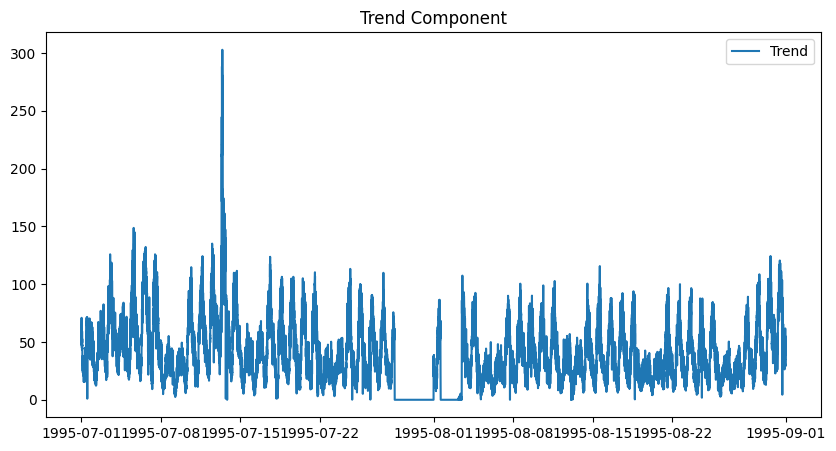

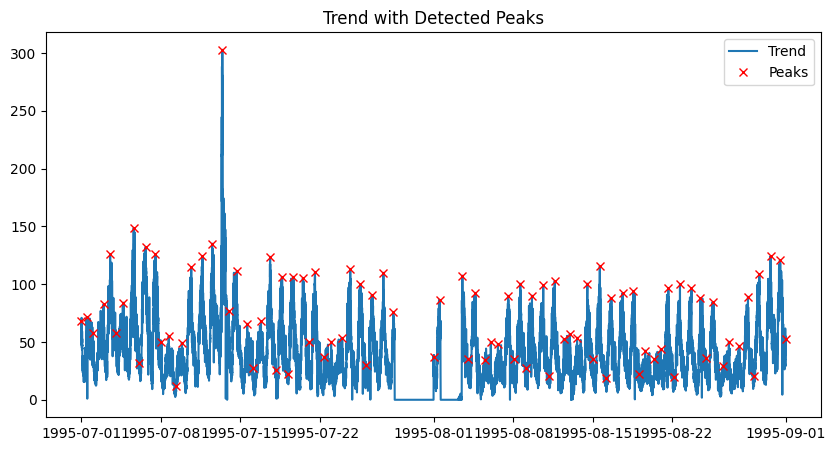

Average Peak Interval: 62255581395348 nanoseconds


In [ ]:

import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df["request_count"], model="additive", period=10)
trend = decomposition.trend

# Drop NaN values in the trend (caused by decomposition)
trend = trend.dropna()

# Plot the trend
plt.figure(figsize=(10, 5))
plt.plot(trend, label="Trend")
plt.title("Trend Component")
plt.legend()
plt.show()

# Detect peaks in the trend
peaks, _ = find_peaks(trend, distance=720)  # Minimum distance between peaks
peak_times = trend.index[peaks]
peak_values = trend.iloc[peaks]

# Plot peaks on the trend
plt.figure(figsize=(10, 5))
plt.plot(trend, label="Trend")
plt.plot(peak_times, peak_values, "rx", label="Peaks")
plt.title("Trend with Detected Peaks")
plt.legend()
plt.show()

# Calculate intervals between peaks
peak_intervals = np.diff(peak_times)  # Time intervals between consecutive peaks
average_interval = np.mean(peak_intervals)

# Convert average interval to a meaningful unit
print(f"Average Peak Interval: {average_interval}") # 17 hours

<Figure size 1000x500 with 0 Axes>

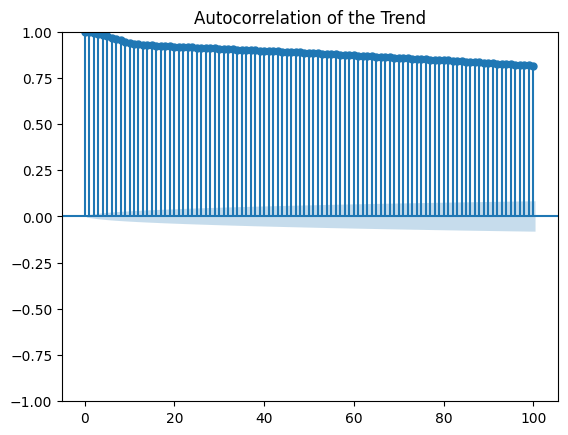

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Compute and plot the autocorrelation
plt.figure(figsize=(10, 5))
plot_acf(trend, lags=100, title="Autocorrelation of the Trend")
plt.show()

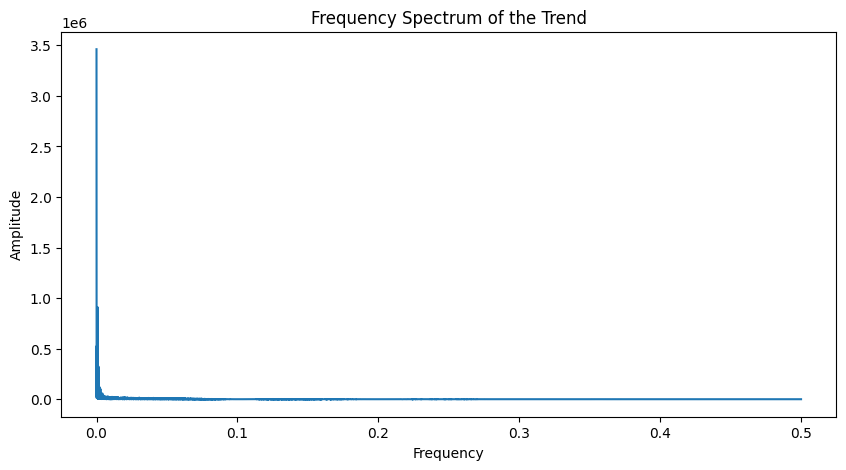

Dominant Period: inf time units


<ipython-input-19-f867dea5f44a>:20: RuntimeWarning: divide by zero encountered in scalar divide
  dominant_period = 1 / dominant_freq


In [ ]:
import numpy as np

# Perform Fourier Transform on the trend
fft = np.fft.fft(trend)
frequencies = np.fft.fftfreq(len(trend), d=1)  # d=1 for time unit consistency

# Magnitudes of the FFT
magnitude = np.abs(fft)

# Plot the frequencies
plt.figure(figsize=(10, 5))
plt.plot(frequencies[:len(frequencies)//2], magnitude[:len(magnitude)//2])  # Positive frequencies only
plt.title("Frequency Spectrum of the Trend")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

# Find the dominant frequency
dominant_freq = frequencies[np.argmax(magnitude[:len(magnitude)//2])]
dominant_period = 1 / dominant_freq
print(f"Dominant Period: {dominant_period} time units")


## Analyze model

 The intercept is the baseline prediction, representing the predicted request count if all past request counts (your input features) were zero. In this case, even without any recent traffic, the model would predict a base level of about 39 requests in the next minute.

 The coefficients show that while older requests (10 to 5 minutes ago) have a moderate influence, the immediate past (within the last 2 minutes) has the greatest impact on predictions.

In [ ]:
model = joblib.load('linear_regression_model.pkl')

In [ ]:
coefficients = model.coef_
intercept = model.intercept_
print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: 38.97669393424969
Coefficients: [ 2.11847994  3.07340483 -0.22466307 -3.3703909  -0.19488255  1.46370689
 -1.24212009 -0.13684568  2.74516693  0.85777891  1.55541351 -2.37657729
  0.16385683 -0.02639055  0.34962241  1.07622638 -0.77698626  0.49567516
  1.90881656 -2.61576226  1.32417707 -0.3506438   0.09003798 -0.44170613
  2.95252646  1.79309896  2.01351202  0.89309217 -2.7293613  -0.40711543
  2.58526167 -0.12900195 -1.77456662  2.10249136  0.54237898  2.04812145
 -1.2875928   1.11827234  2.05673032 -0.49505132  3.8238016  -2.75198249
  0.37335237  0.30759083 -1.78540215 12.54721202  3.97241499 -0.68988965
 -3.11660291  1.52645248]


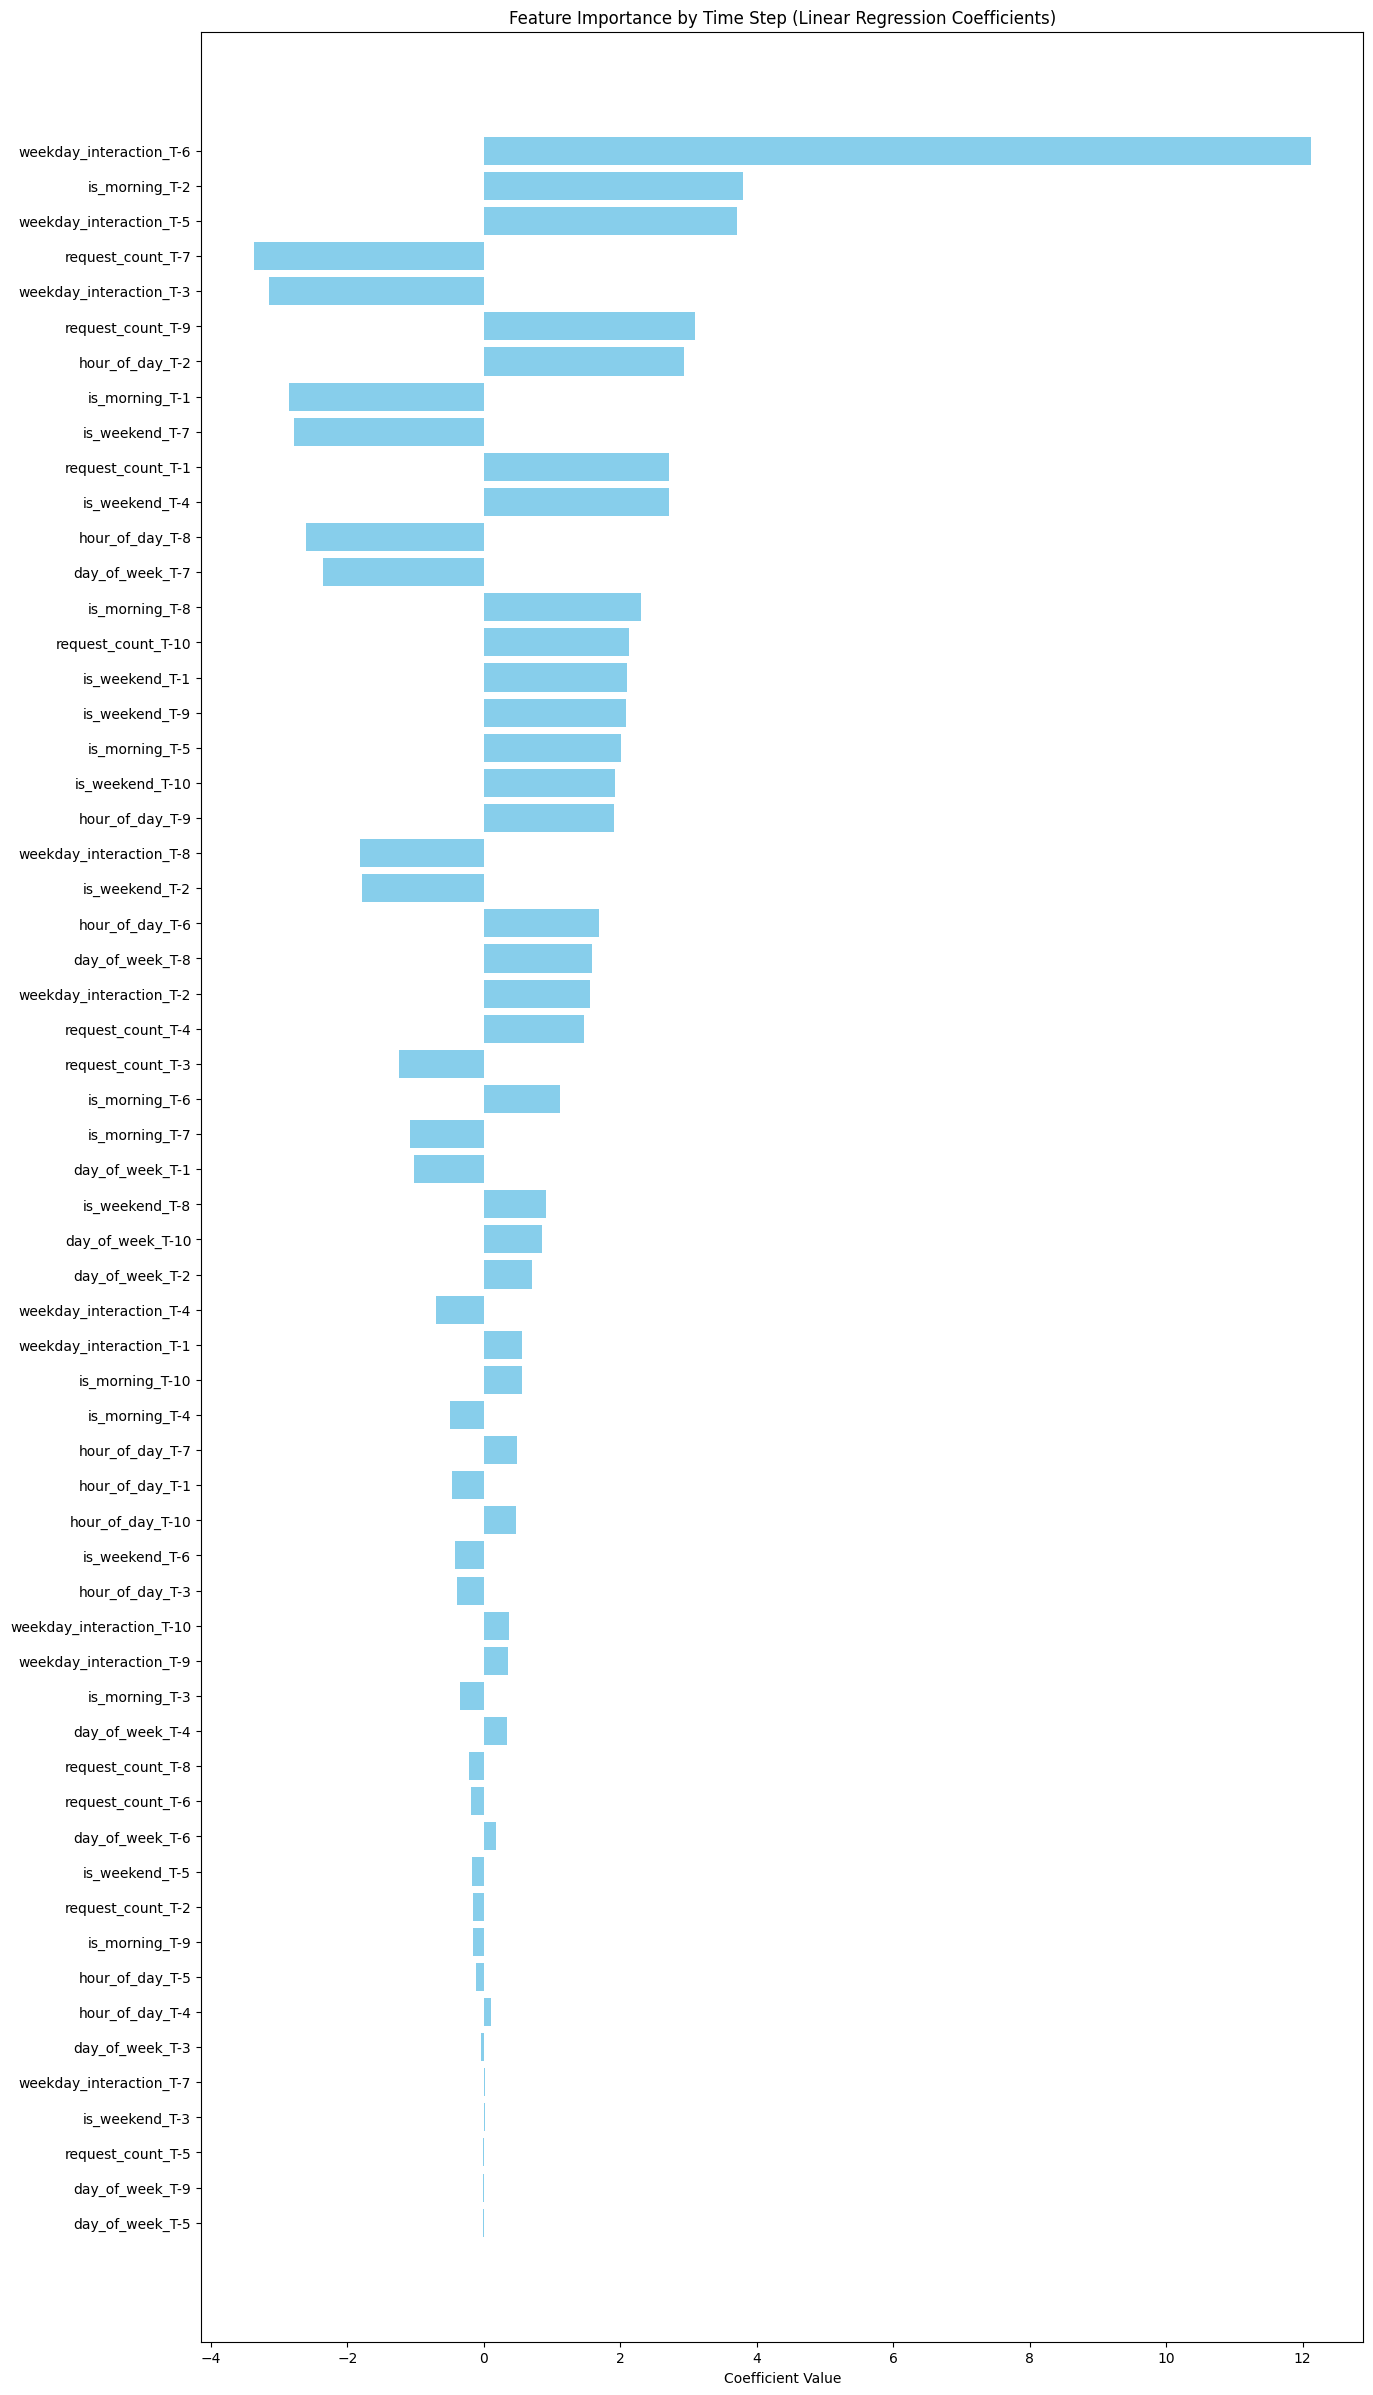

In [70]:
import matplotlib.pyplot as plt

coefficients = model.coef_.flatten()

# Create a DataFrame to associate each coefficient with its respective time step in the sequence
time_steps = [f'T-{i}' for i in range(seq_length, 0, -1)]  # Naming each step as T-10, T-9, ..., T-1
# Create feature list = time_steps*features
features = ['request_count', 'day_of_week', 'hour_of_day', 'is_weekend',
       'is_morning',
       'weekday_interaction']
total_features = [f"{feature}_{time_step}" for feature in features for time_step in time_steps]

# Create a DataFrame
coefficients_df = pd.DataFrame({
    'Time Step': total_features, #time_steps,
    'Coefficient': coefficients
})
#sort coefficients_df by absolute coefficients
coefficients_df = coefficients_df.sort_values(by='Coefficient', key=abs, ascending=False)
# Plot the coefficients
plt.figure(figsize=(15, 30))
plt.barh(coefficients_df['Time Step'], coefficients_df['Coefficient'], color="skyblue")
plt.xlabel('Coefficient Value')
plt.title('Feature Importance by Time Step (Linear Regression Coefficients)')
plt.gca().invert_yaxis()  # To have T-10 at the top
plt.show()

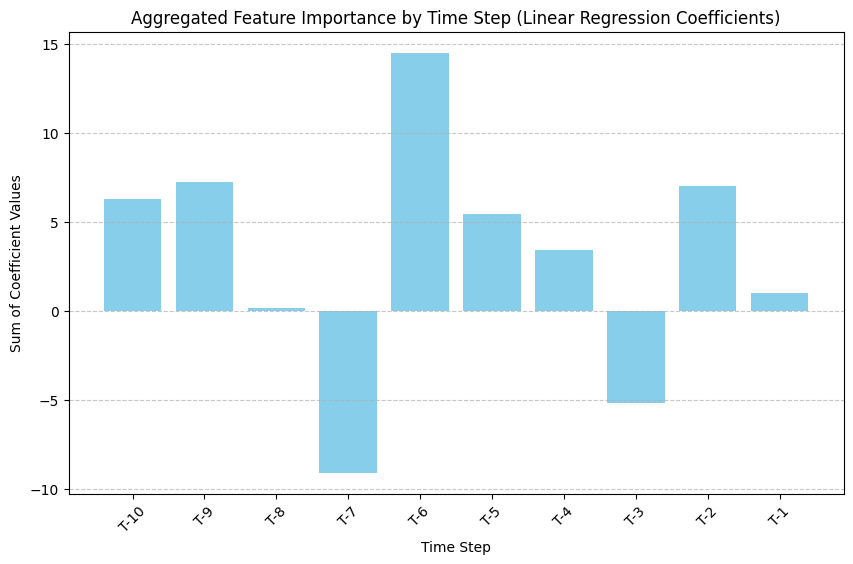

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract time step for grouping (e.g., "T-10", "T-9")
coefficients_df['Time Step Only'] = coefficients_df['Time Step'].apply(lambda x: x.split('_')[-1])

# Group by time step and sum coefficients
time_step_sums = coefficients_df.groupby('Time Step Only')['Coefficient'].sum().reset_index()

# Sort by time step order (e.g., T-10 to T-1)
time_step_sums['Time Step Only'] = pd.Categorical(
    time_step_sums['Time Step Only'],
    categories=[f"T-{i}" for i in range(seq_length, 0, -1)],
    ordered=True
)
time_step_sums = time_step_sums.sort_values('Time Step Only')

# Plot the aggregated coefficients by time step
plt.figure(figsize=(10, 6))
plt.bar(time_step_sums['Time Step Only'], time_step_sums['Coefficient'], color="skyblue")
plt.xlabel('Time Step')
plt.ylabel('Sum of Coefficient Values')
plt.title('Aggregated Feature Importance by Time Step (Linear Regression Coefficients)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


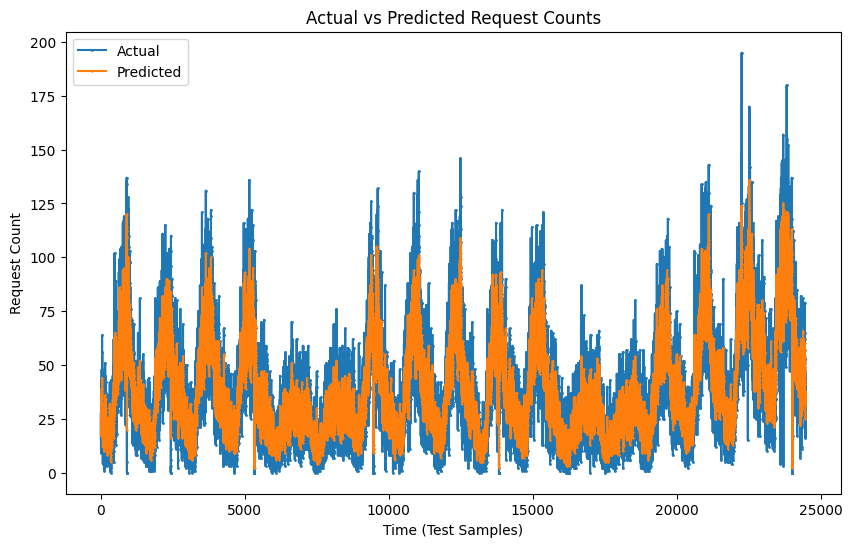

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual", marker='o', markersize=1)
plt.plot(y_pred, label="Predicted", marker='x', markersize=1)
plt.title("Actual vs Predicted Request Counts")
plt.xlabel("Time (Test Samples)")
plt.ylabel("Request Count")
plt.legend()
plt.show()


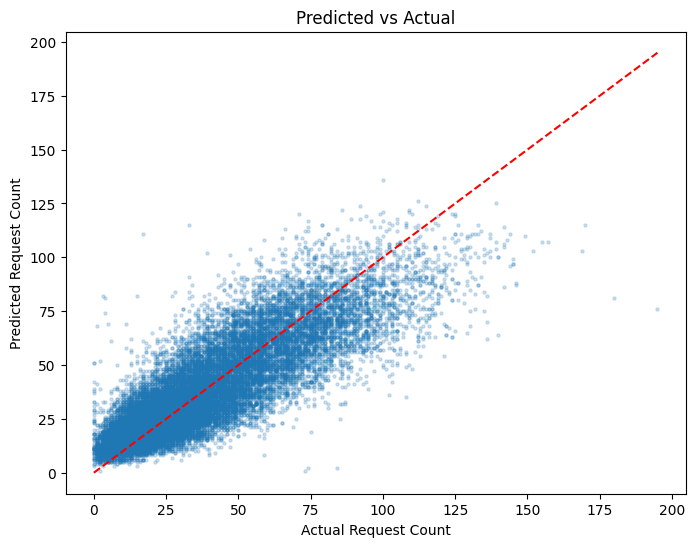

In [ ]:
#heck how closely predictions match actual values (should ideally follow a 45° line).
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.2, s=5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.title("Predicted vs Actual")
plt.xlabel("Actual Request Count")
plt.ylabel("Predicted Request Count")
plt.show()


## Analyze residuals

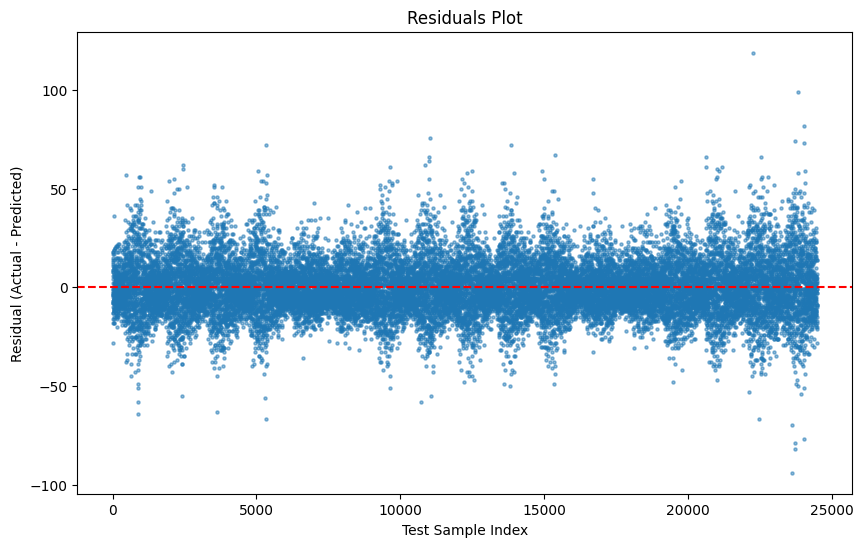

In [12]:
import matplotlib.pyplot as plt
#Plot residuals to check for patterns (should ideally be randomly distributed).
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.5, s=5)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals Plot")
plt.xlabel("Test Sample Index")
plt.ylabel("Residual (Actual - Predicted)")
plt.show()


<ipython-input-21-b69a847262eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['hour'] = test_df.index.hour
<ipython-input-21-b69a847262eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['residuals'] = residuals


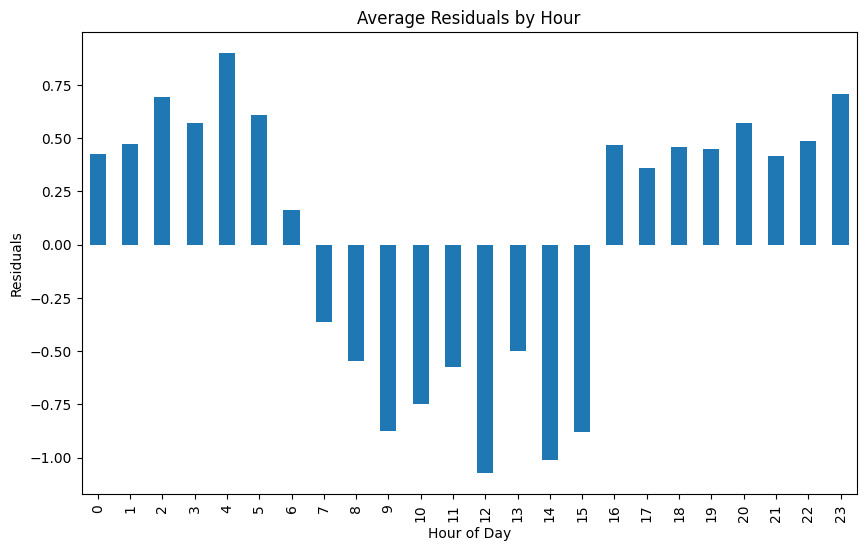

In [21]:
# Group errors by time of day
test_df = df.iloc[-len(y_test):]
test_df['hour'] = test_df.index.hour
test_df['residuals'] = residuals
hourly_error = test_df.groupby('hour')['residuals'].mean()
hourly_error.plot(kind='bar', figsize=(10, 6), title="Average Residuals by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Residuals")
plt.show()


<ipython-input-22-0b47be60aae9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['weekday'] = test_df.index.weekday
<ipython-input-22-0b47be60aae9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['residuals'] = residuals


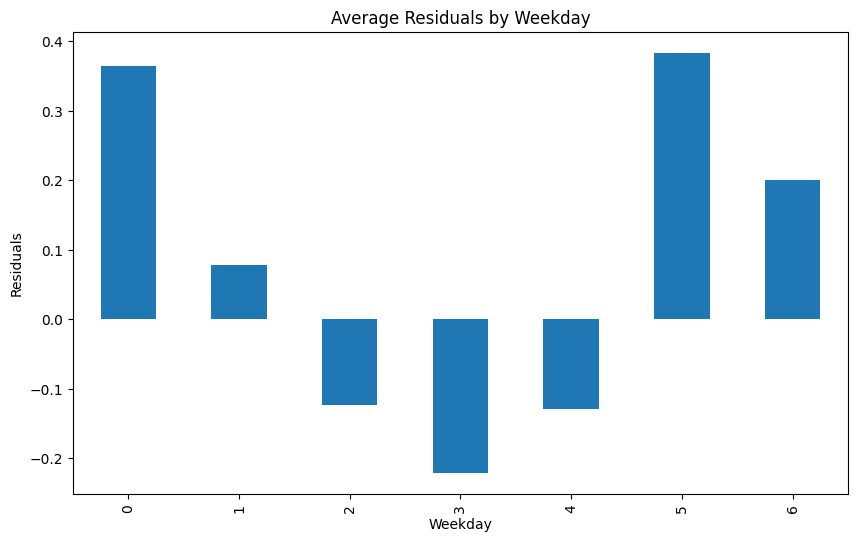

In [22]:
# Group errors by time of day
test_df = df.iloc[-len(y_test):]
test_df['weekday'] = test_df.index.weekday
test_df['residuals'] = residuals
hourly_error = test_df.groupby('weekday')['residuals'].mean()
hourly_error.plot(kind='bar', figsize=(10, 6), title="Average Residuals by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Residuals")
plt.show()


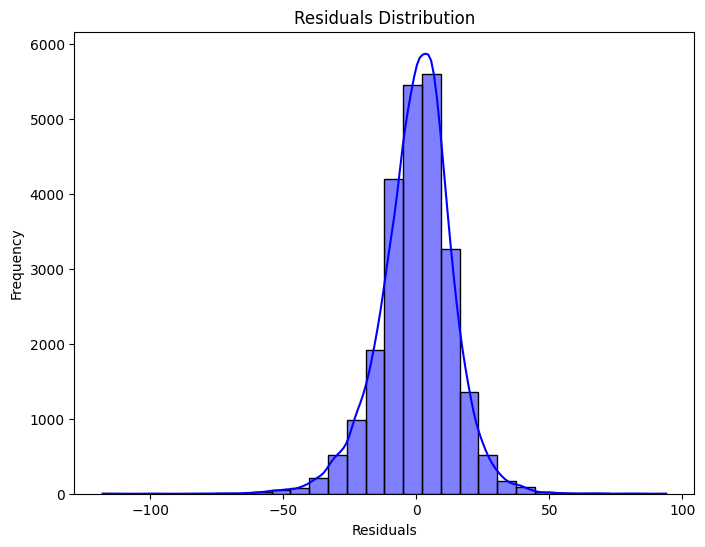

In [ ]:
#Check if residuals are normally distributed.
"""
A normal distribution of residuals suggests the errors are centered around zero, meaning:
- The model neither systematically overpredicts nor underpredicts.
- Predictions are unbiased.
"""
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


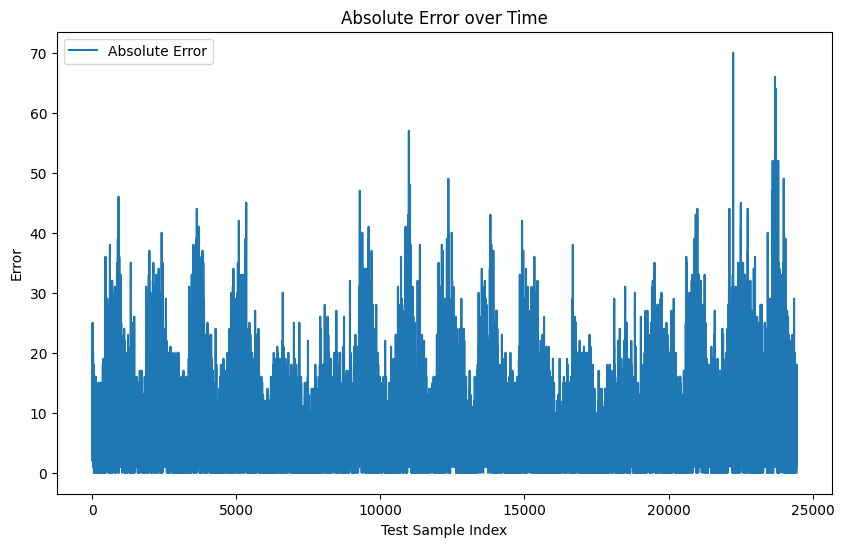

In [ ]:
#Plot the error (absolute or squared) over time to identify trends or specific times with high errors.
absolute_errors = abs(residuals)

plt.figure(figsize=(10, 6))
plt.plot(absolute_errors, label="Absolute Error")
plt.title("Absolute Error over Time")
plt.xlabel("Test Sample Index")
plt.ylabel("Error")
plt.legend()
plt.show()


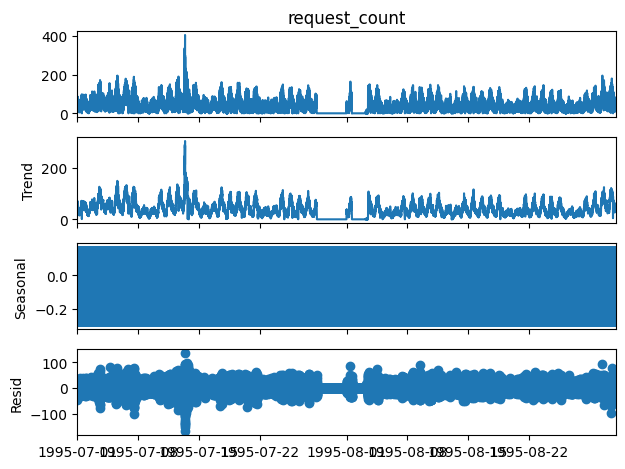

In [ ]:
# Decompose the request count time series into trend, seasonality, and residual components to analyze patterns.
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df["request_count"], model="additive", period=10)
decomposition.plot()
plt.show()


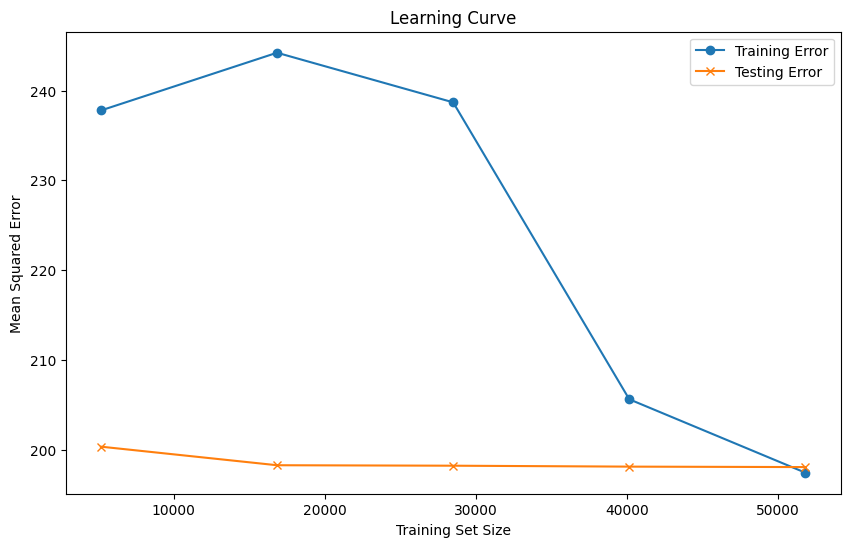

In [17]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Error", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Testing Error", marker='x')
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()


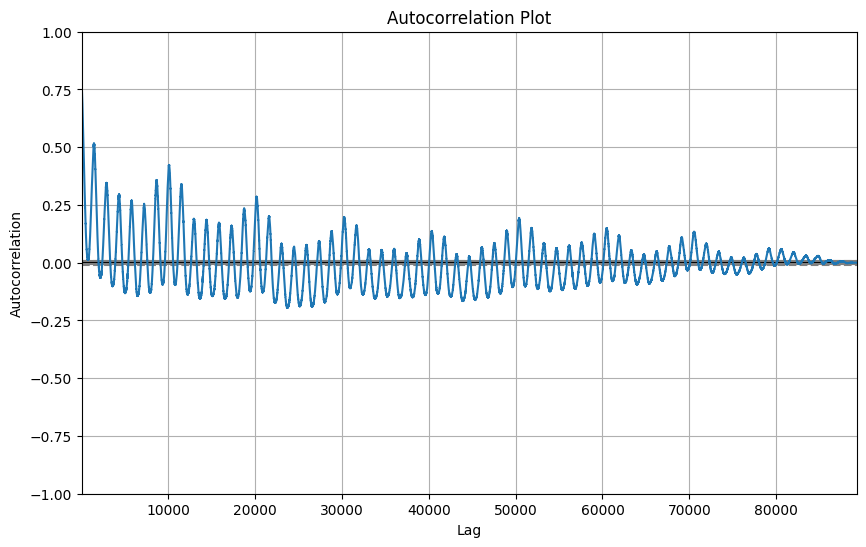

In [ ]:
# Plot the autocorrelation of the request count data to understand temporal dependencies.
from pandas.plotting import autocorrelation_plot
"""
X-axis (Lags):

Each point represents a lag. For example:
Lag 1: Correlation between
𝑡 and t−1.
Lag 2: Correlation between
𝑡 and t−2.

Y-axis (Autocorrelation):

Values closer to +1 or -1 indicate stronger dependencies.
Values near 0 indicate weak or no dependency.

Key Observations:

Significant Peaks: A spike at a specific lag suggests strong temporal dependency.
For example, a high value at lag 1 suggests yesterday’s request counts strongly influence today’s.
Decaying Trend: If autocorrelation decreases over lags, it suggests short-term dependencies.
Seasonality: Peaks at regular intervals (e.g., lag 7, lag 14) may indicate weekly patterns.
"""
plt.figure(figsize=(10, 6))
autocorrelation_plot(df["request_count"])
plt.title("Autocorrelation Plot")
plt.show()


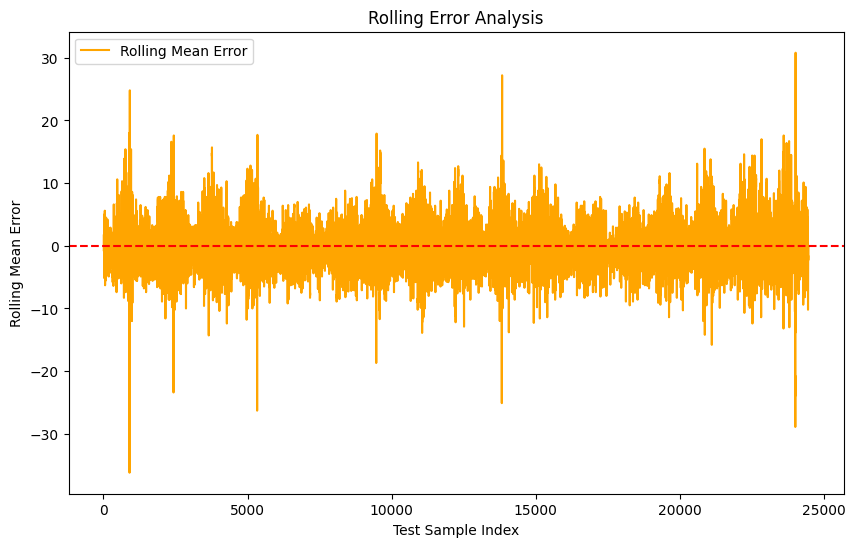

In [ ]:
#Analyze the rolling mean of errors to identify trends.
"""
If the rolling mean shows periodic fluctuations, it might reflect seasonal trends in the data that the model hasn't captured well (e.g., daily or weekly cycles).
"""
rolling_error = pd.Series(residuals.reshape(residuals.shape[0])).rolling(window=10).mean()

plt.figure(figsize=(10, 6))
plt.plot(rolling_error, label="Rolling Mean Error", color="orange")
plt.axhline(0, color="red", linestyle="--")
plt.title("Rolling Error Analysis")
plt.xlabel("Test Sample Index")
plt.ylabel("Rolling Mean Error")
plt.legend()
plt.show()


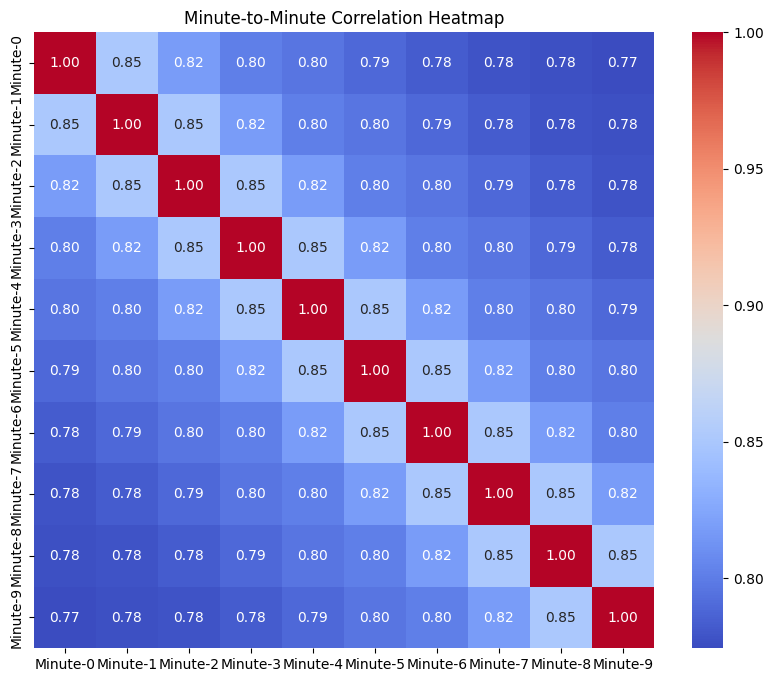

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

first_10_minutes = df["request_count"]
rolling_df = pd.DataFrame(
    {f"Minute-{i}": first_10_minutes.shift(-i).iloc[:len(first_10_minutes) - 9].values for i in range(10)}
)


# Calculate the correlation matrix
correlation_matrix = rolling_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Minute-to-Minute Correlation Heatmap")
plt.show()

In [ ]:
rolling_df

,Minute-0,Minute-1,Minute-2,Minute-3,Minute-4,Minute-5,Minute-6,Minute-7,Minute-8,Minute-9
0,42,61.0,57.0,71.0,70.0,54.0,52.0,68.0,47.0,46.0
1,61,57.0,71.0,70.0,54.0,52.0,68.0,47.0,46.0,51.0
2,57,71.0,70.0,54.0,52.0,68.0,47.0,46.0,51.0,71.0
3,71,70.0,54.0,52.0,68.0,47.0,46.0,51.0,71.0,56.0
4,70,54.0,52.0,68.0,47.0,46.0,51.0,71.0,56.0,44.0
...,...,...,...,...,...,...,...,...,...,...
89266,30,39.0,21.0,31.0,46.0,36.0,47.0,28.0,17.0,30.0
89267,39,21.0,31.0,46.0,36.0,47.0,28.0,17.0,30.0,38.0
89268,21,31.0,46.0,36.0,47.0,28.0,17.0,30.0,38.0,16.0
89269,31,46.0,36.0,47.0,28.0,17.0,30.0,38.0,16.0,17.0


Text(0.5, 1.0, 'Correlation Heatmap')

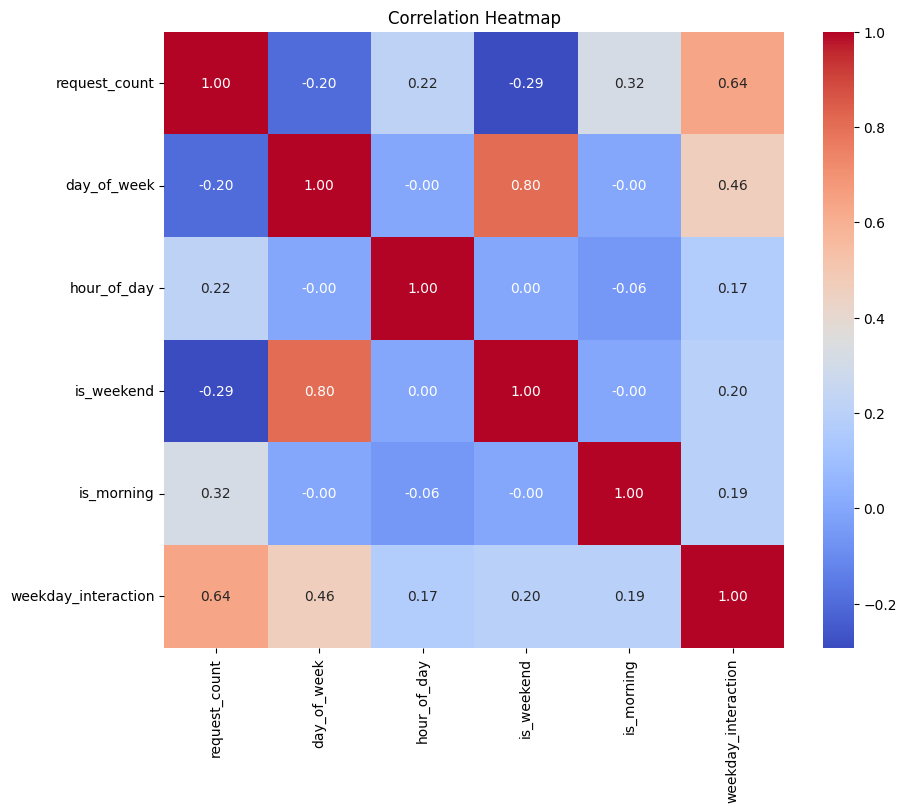

In [75]:
# plot correlation plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")